# Przewidywanie wyniku meczu piłkarskiego

Michał Strzeżoń, Aleksander Mazur

## Przygotowanie zbioru

Zacznijmy od wczytania danych

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import pandas as pd
import numpy as np

df = pd.read_pickle('../data/ml_data.pkl')

In [3]:
df.head()

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,...,away_player_4_age,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year
0,24,2,1,1,0,0,0,0,0,0,...,21,21,22,23,27,27,26,19,2,2009
1,22,2,2,1,0,0,0,0,0,0,...,25,23,25,22,19,29,23,21,12,2010
2,8,0,2,1,0,0,0,0,0,0,...,24,22,25,22,20,19,22,21,9,2010
3,6,2,2,1,0,0,0,0,0,0,...,24,22,29,25,22,19,22,21,9,2010
4,30,0,1,1,0,0,0,0,0,0,...,23,23,29,23,25,19,23,21,3,2011


In [4]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

Popatrzmy na kolumny jakie ma nasza wczytana tabela

In [5]:
print_full(df.columns.values)

array(['stage', 'home_team_goal', 'away_team_goal',
       'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositionin

Nasze dane składają się z:
- kolejka rozgrywania meczu,
- liczba strzelonych goli przez drużynę grającą u siebie
- liczba strzelonych goli przez drużynę grającą na wyjeździe
- liga rozgrywania meczu (one hot encoding)
- średnie kursy bukmacherów
- statystki drużyny z gry FIFA (0-100),
- statystyki piłkarz z gry FIFA (0-100)
- data rozegrania meczu (miesiąc, rok)

Jako, że chcemy przewidywać, która drużyna wygra lub czy będzie remis musimy zmienić kolumny z golami strzelonymi przez drużyny na one hot encoding

In [6]:
df["result"] = df.apply(lambda r: (-1 if r["home_team_goal"] > r["away_team_goal"] else 1 if r["home_team_goal"] < r["away_team_goal"] else 0), axis=1)

In [7]:
df['result']

0       -1
1        0
2        1
3        0
4        1
        ..
19607   -1
19608   -1
19609    0
19610   -1
19611   -1
Name: result, Length: 19612, dtype: int64

In [8]:
df['home_team_goal']

0        2
1        2
2        0
3        2
4        0
        ..
19607    4
19608    3
19609    1
19610    2
19611    2
Name: home_team_goal, Length: 19612, dtype: int64

In [9]:
df['away_team_goal']

0        1
1        2
2        2
3        2
4        1
        ..
19607    0
19608    0
19609    1
19610    0
19611    0
Name: away_team_goal, Length: 19612, dtype: int64

In [10]:
df = pd.get_dummies(df, columns=['result'])

In [11]:
df

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,...,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year,result_-1,result_0,result_1
0,24,2,1,1,0,0,0,0,0,0,...,23,27,27,26,19,2,2009,1,0,0
1,22,2,2,1,0,0,0,0,0,0,...,22,19,29,23,21,12,2010,0,1,0
2,8,0,2,1,0,0,0,0,0,0,...,22,20,19,22,21,9,2010,0,0,1
3,6,2,2,1,0,0,0,0,0,0,...,25,22,19,22,21,9,2010,0,1,0
4,30,0,1,1,0,0,0,0,0,0,...,23,25,19,23,21,3,2011,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19607,28,4,0,0,0,0,1,0,0,0,...,26,32,29,26,29,4,2009,1,0,0
19608,12,3,0,0,0,0,1,0,0,0,...,30,27,31,25,28,11,2008,1,0,0
19609,20,1,1,0,0,0,1,0,0,0,...,30,29,32,25,29,2,2009,0,1,0
19610,18,2,0,0,0,0,1,0,0,0,...,30,27,32,27,29,1,2009,1,0,0


In [12]:
df = df.drop(["home_team_goal", "away_team_goal"], axis=1)

In [13]:
df = df.rename(columns={"result_-1": "win", "result_0": "draw", "result_1": "lost"})

In [14]:
print_full(df.head())

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,league_name_Spain LIGA BBVA,league_name_Switzerland Super League,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,home_team_buildUpPlaySpeed,home_team_buildUpPlayDribbling,home_team_buildUpPlayPassing,home_team_chanceCreationPassing,home_team_chanceCreationCrossing,home_team_chanceCreationShooting,home_team_defencePressure,home_team_defenceAggression,home_team_defenceTeamWidth,home_team_buildUpPlayPositioningClass_Free_Form,home_team_buildUpPlayPositioningClass_Organised,home_team_chanceCreationPositioningClass_Free_Form,home_team_chanceCreationPositioningClass_Organised,home_team_defenceDefenderLineClass_Cover,home_team_defenceDefenderLineClass_Offside_Trap,away_team_buildUpPlaySpeed,away_team_buildUpPlayDribbling,away_team_buildUpPlayPassing,away_team_chanceCreationPassing,away_team_chanceCreationCrossing,away_team_chanceCreationShooting,away_team_defencePressure,away_team_defenceAggression,away_team_defenceTeamWidth,away_team_buildUpPlayPositioningClass_Free_Form,away_team_buildUpPlayPositioningClass_Organised,away_team_chanceCreationPositioningClass_Free_Form,away_team_chanceCreationPositioningClass_Organised,away_team_defenceDefenderLineClass_Cover,away_team_defenceDefenderLineClass_Offside_Trap,home_player_1_height,home_player_1_weight,home_player_1_overall_rating,home_player_1_potential,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_1_preferred_foot_left,home_player_1_preferred_foot_right,home_player_2_height,home_player_2_weight,home_player_2_overall_rating,home_player_2_potential,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_preferred_foot_left,home_player_2_preferred_foot_right,home_player_3_height,home_player_3_weight,home_player_3_overall_rating,home_player_3_potential,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,

Popatrzmy jeszcze raz na kolumny jakie teraz mamy. Widzimy, że w zbiorze są kolumny na temat zakładów u bukmachera. Pozbędziemy się ich, ponieważ mogę wpływać na naszą sieć, a my chcemy przewidywać wyniki meczy na podstawie czynników, które mają na nie wpływ.

In [15]:
print_full(df.columns.values)

array(['stage', 'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositioningClass_Organised',
       'home_team_chance

In [16]:
df = df.drop(["avg_odds_home_win", "avg_odds_draw", "avg_odds_away_win", "month", "year"], axis=1)

In [17]:
print_full(df.describe())

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,league_name_Spain LIGA BBVA,league_name_Switzerland Super League,home_team_buildUpPlaySpeed,home_team_buildUpPlayDribbling,home_team_buildUpPlayPassing,home_team_chanceCreationPassing,home_team_chanceCreationCrossing,home_team_chanceCreationShooting,home_team_defencePressure,home_team_defenceAggression,home_team_defenceTeamWidth,home_team_buildUpPlayPositioningClass_Free_Form,home_team_buildUpPlayPositioningClass_Organised,home_team_chanceCreationPositioningClass_Free_Form,home_team_chanceCreationPositioningClass_Organised,home_team_defenceDefenderLineClass_Cover,home_team_defenceDefenderLineClass_Offside_Trap,away_team_buildUpPlaySpeed,away_team_buildUpPlayDribbling,away_team_buildUpPlayPassing,away_team_chanceCreationPassing,away_team_chanceCreationCrossing,away_team_chanceCreationShooting,away_team_defencePressure,away_team_defenceAggression,away_team_defenceTeamWidth,away_team_buildUpPlayPositioningClass_Free_Form,away_team_buildUpPlayPositioningClass_Organised,away_team_chanceCreationPositioningClass_Free_Form,away_team_chanceCreationPositioningClass_Organised,away_team_defenceDefenderLineClass_Cover,away_team_defenceDefenderLineClass_Offside_Trap,home_player_1_height,home_player_1_weight,home_player_1_overall_rating,home_player_1_potential,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_1_preferred_foot_left,home_player_1_preferred_foot_right,home_player_2_height,home_player_2_weight,home_player_2_overall_rating,home_player_2_potential,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_preferred_foot_left,home_player_2_preferred_foot_right,home_player_3_height,home_player_3_weight,home_player_3_overall_rating,home_player_3_potential,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,home_player_3_agility,home_player_3_reactions,home

Nasze dane składają się z:
- kolejka
- liga, w której rozgrywany jest mecz. Największa ilość meczy jest z ligi angielskiej i francuskiej, zaraz za nimi są liga hiszpańska i niemiecka. Ta informacja jest nam potrzebna
- kolejne kolumny to statystyki z gry FIFA drużyn i zawodników. Są to najważniejsze statystyki, od których na pewno zależy wynik meczu
- wiek zawodników. Według nas ma wpływ na wynik meczu dlatego uwzględnimy go w trenowaniu sieci
- rezultat meczu jako one hot encoding, gdzie win oznacza zwycięstwo drużyny, która gra u siebie. Analogicznie lost

Ułóżmy nasze kolumny w następującej kolejności:
- zawodnicy drużyny grającej u siebie,
- zawodnicy drużyny przyjezdnej
- drużyna domowa,
- drużyna wyjazdowa,
- informacja o lidze,
- etap sezonu

In [18]:
columns = []
for i in range(1, 12):
    home_player = [x for x in df.columns.values if x.startswith('home_player_' + str(i) + '_')]
    columns.extend(home_player)
    
for i in range(1, 12):
    away_player = [x for x in df.columns.values if x.startswith('away_player_' + str(i) + '_')]
    columns.extend(away_player)
    
home_team = [x for x in df.columns.values if x.startswith('home_team')]
away_team = [x for x in df.columns.values if x.startswith('away_team')]

league = [x for x in df.columns.values if x.startswith('league_name_')]
stage = 'stage'

columns.extend(home_team)
columns.extend(away_team)
columns.extend(league)
columns.append(stage)
columns.extend(('win', 'draw', 'lost'))

columns

['home_player_1_height',
 'home_player_1_weight',
 'home_player_1_overall_rating',
 'home_player_1_potential',
 'home_player_1_attacking_work_rate',
 'home_player_1_defensive_work_rate',
 'home_player_1_crossing',
 'home_player_1_finishing',
 'home_player_1_heading_accuracy',
 'home_player_1_short_passing',
 'home_player_1_volleys',
 'home_player_1_dribbling',
 'home_player_1_curve',
 'home_player_1_free_kick_accuracy',
 'home_player_1_long_passing',
 'home_player_1_ball_control',
 'home_player_1_acceleration',
 'home_player_1_sprint_speed',
 'home_player_1_agility',
 'home_player_1_reactions',
 'home_player_1_balance',
 'home_player_1_shot_power',
 'home_player_1_jumping',
 'home_player_1_stamina',
 'home_player_1_strength',
 'home_player_1_long_shots',
 'home_player_1_aggression',
 'home_player_1_interceptions',
 'home_player_1_positioning',
 'home_player_1_vision',
 'home_player_1_penalties',
 'home_player_1_marking',
 'home_player_1_standing_tackle',
 'home_player_1_sliding_tackle'

In [19]:
len(columns)

869

In [20]:
df = df[columns].copy()
len(df.columns.values)

869

### Rozkład danych

In [21]:
win_count = df['win'].sum()
draw_count = df['draw'].sum()
lost_count = df['lost'].sum()

total = win_count + draw_count + lost_count
print('Examples:\n    Total: {}\n    Win: {} ({:.2f}% of total)\n    Draw: {} ({:.2f}% of total)\n    Lost: {} ({:.2f}% of total)\n'.format(
    total, win_count, 100 * win_count / total,
    draw_count, draw_count * 100 / total,
    lost_count, lost_count * 100 / total))

Examples:
    Total: 19612
    Win: 9003 (45.91% of total)
    Draw: 4953 (25.25% of total)
    Lost: 5656 (28.84% of total)



### Podział i normalizacja danych
Zanim przystąpimy do treningu naszej podzielmy nasz cały zbiór na zbiory: uczący, walidacyjny, testowy

In [22]:
input_shape = len(df.columns.values) - 3 
X = df.iloc[:, :-3].to_numpy()
y = df.iloc[:, -3:].to_numpy()
input_shape

866

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

Następnie przeskalujmy dane używając StandardScaler. Po tej operacji średnia będzie wynosić 0, a odchylenie standardowe 1

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Wstępny model
Przewidywanie modelu możemy potraktować jako zadanie klasyfikacji wieloklasowej. W tym przypadku mecz możemy przyporządkować do jednej z 3 klas: wygrany, zremisowany, przegrany. Na wynik patrzymy okiem drużyny grającej u siebie. Na początek zaczniemy od najprostszej sieci składającej się z 4 warstw. Zanim ją zbudujemy, utwórzmy zbiór X i y.

In [26]:
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

TensorFlow version: 2.10.0
Keras version: 2.10.0


In [79]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               443904    
                                                                 
 dense_25 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 445,443
Trainable params: 445,443
Non-trainable params: 0
_________________________________________________________________


Zamiast używać `binary_crossentropy`, użyjemy `categorical_crossentropy`, która mierzy odległość między dwoma rozkładami prawdopodobieństwa:
* wynikiem rozkładu prawdopodobieństwa naszej sieci oraz
* prawdziwą dystrybucją etykiet.

Minimalizując odległość między tymi dwoma rozkładami, uczymy nasz model, aby wyprowadzał coś jak najbardziej zbliżonego do prawdziwych etykiet (co nazywamy prawdą fundamentalną (ground truth)).

Jako metrykę użyjemy accuracy

In [80]:
model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Teraz wytrenujmy nasz model dla 100 epok:

In [81]:
epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
99/99 [==============================] - 1s 6ms/step - loss: 1.1852 - accuracy: 0.4737 - val_loss: 1.0810 - val_accuracy: 0.4761
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 0.8683 - accuracy: 0.6055 - val_loss: 1.0790 - val_accuracy: 0.4908
Epoch 3/100
99/99 [==============================] - 0s 3ms/step - loss: 0.7503 - accuracy: 0.6772 - val_loss: 1.1674 - val_accuracy: 0.4920
Epoch 4/100
99/99 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.7399 - val_loss: 1.1792 - val_accuracy: 0.4911
Epoch 5/100
99/99 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.8020 - val_loss: 1.3673 - val_accuracy: 0.4649
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.8466 - val_loss: 1.3642 - val_accuracy: 0.4713
Epoch 7/100
99/99 [==============================] - 0s 3ms/step - loss: 0.3010 - accuracy: 0.9108 - val_loss: 1.4215 - val_accuracy: 0.4589
Epoch 8/100
9

In [82]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 2ms/step - loss: 3.5576 - accuracy: 0.4502


Przygotujmy sobie funkcje, które przydadzą nam się w dalszych praca. Chodzi o wykres porównujący loss i accuracy.

In [83]:
import matplotlib.pyplot as plt

In [27]:
def PlotLossComparison(loss1, val_loss1):
    plt.clf()
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss 1')
    plt.plot(epochs, val_loss1, 'b', label='Validation loss 1')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [28]:
def PlotAccuracyComparison(acc1, val_acc1):
    plt.clf()
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Pokażmy wykresy strat (loss) i dokładności (accuracy):

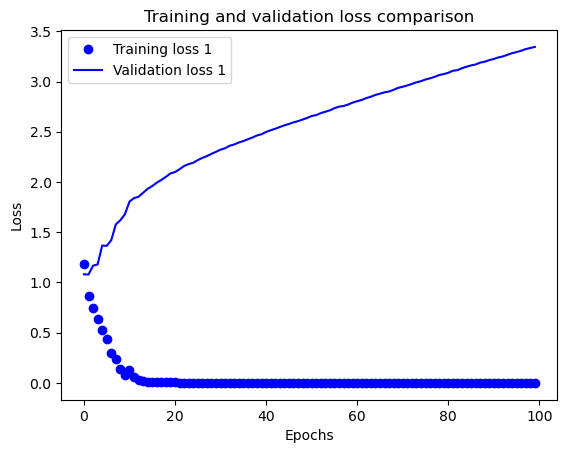

In [86]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

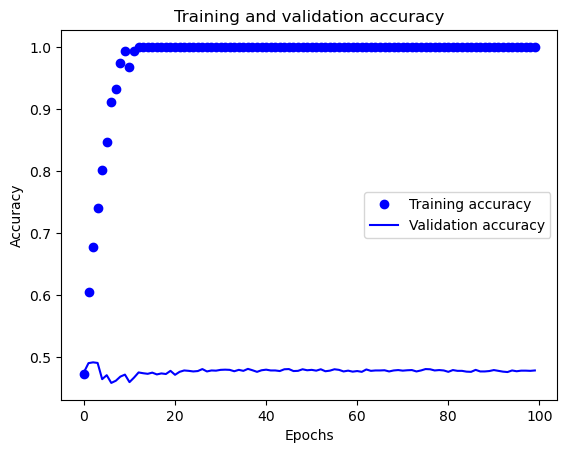

In [87]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Nasza sieć zaczęła się od razu dopasowywać do danych. Problemem, może być zbyt mała złożoność modelu. Spróbujmy zwiększyć złożoność modelu i jeszcze raz nauczyć

In [88]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)

Epoch 1/100
79/79 [==============================] - 1s 5ms/step - loss: 1.0016 - accuracy: 0.5147 - val_loss: 0.9758 - val_accuracy: 0.5281
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.9102 - accuracy: 0.5703 - val_loss: 1.0163 - val_accuracy: 0.4934
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.8109 - accuracy: 0.6365 - val_loss: 1.0677 - val_accuracy: 0.5169
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6585 - accuracy: 0.7235 - val_loss: 1.2095 - val_accuracy: 0.5229
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.4526 - accuracy: 0.8261 - val_loss: 1.4560 - val_accuracy: 0.4640
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.2820 - accuracy: 0.8951 - val_loss: 1.8659 - val_accuracy: 0.4695
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.1981 - accuracy: 0.9279 - val_loss: 2.1804 - val_accuracy: 0.4432
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 0.9878 - val_loss: 4.8554 - val_accuracy: 0.4588
Epoch 60/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9880 - val_loss: 4.3563 - val_accuracy: 0.4739
Epoch 61/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9911 - val_loss: 4.5223 - val_accuracy: 0.4703
Epoch 62/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 4.7162 - val_accuracy: 0.4624
Epoch 63/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 4.6064 - val_accuracy: 0.4612
Epoch 64/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 4.2415 - val_accuracy: 0.4679
Epoch 65/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0188 - accuracy: 0.9930 - val_loss: 4.8359 - val_accuracy: 0.4763
Epoch 

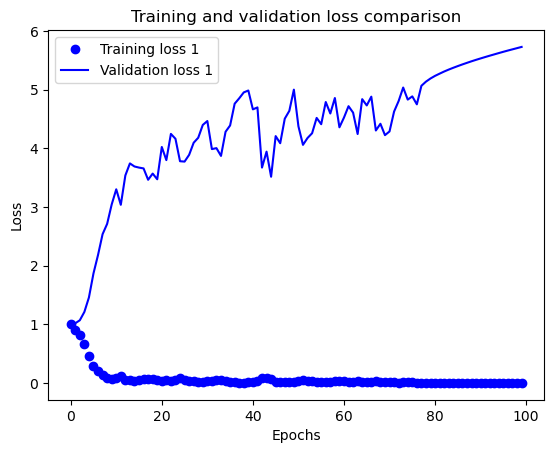

In [89]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

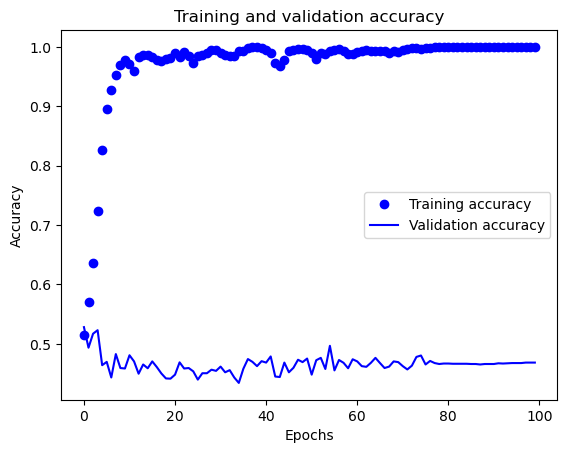

In [90]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Model nadal się przeucza. W następnych częściach skupimy się na optymalizacji modelu, aby nie było zjawiska overfittingu

### Optymalizacja modelu
Jako kolejny etap przygotujmy sobie funkcję, która wyświetli macierz konfuzji.

<b>Macierz konfuzji</b> (`confusion matrix`) pokazuje nam, w ilu przypadkach dane testowe zostały poprawnie zaklasyfikowane (główna przekątna macierzy), w ilu niepoprawnie, oraz wzorce których klas byly najczęściej mylone z wzrocami innych klas. 
Macierz konfuzji pozwala przeanalizować, wzorce których klas są najczęściej błędnie klasyfikowane, oraz pozwalają podjąć działania zmierzające do wzmocnienia/powtórzenia procesu uczenia dla tych najtrudniej klasyfikowanych klas lub wzorców, ew. dokonanie augmentacji dla wzorców tych klas, o ile to możliwe. Dlatego w przypadku problemów klasyfikacji macierz konfuzji powinna zostać dokładnie przeanalizowana, a wnioski wykorzystane do poprawy klasyfikatora. Skupiamy się oczywiście na wzorcach tych klas, gdzie wartości poza główną przekątną macierzy są największe. Pomaga również obejrzenie przykładów testowych błędnie sklasyfikowanych, gdyż może się okazać, iż są błędnie przyporządkowane do etykiet albo nawet człowiek lub nikt nie jest w stanie tego zrobić poprawnie ze względu na słabą jakość, rozmycie lub inne czynniki (przekroczenie tzw. "human-level performance"). 

In [29]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
LABELS= ['Win', 'Draw', 'Lost']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

123/123 [==============================] - 0s 1ms/step


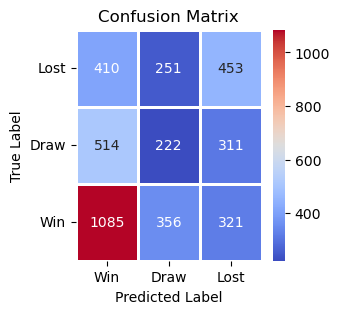

              precision    recall  f1-score   support

           0       0.54      0.62      0.58      1762
           1       0.27      0.21      0.24      1047
           2       0.42      0.41      0.41      1114

    accuracy                           0.45      3923
   macro avg       0.41      0.41      0.41      3923
weighted avg       0.43      0.45      0.44      3923



In [92]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Widzimy, że model najczęściej obstawia zwycięstwo drużyny grającej u siebie. W pozostałych przypadka wygląda jakby strzelał

Jak wygląda liczba przypadków w naszym zbiorze treningowym?

In [93]:
np.sum(y_train, axis=0)

array([5816, 3130, 3605], dtype=uint32)

Nie wiemy jak wygląda zbiór walidacyjny, stanowi on 20% zbioru testowego, lecz nie wiem jak dużo meczy danego typu wpada do niego. Dlatego utwórzmy ten zbiór ręcznie

In [94]:
y_train.shape

(12551, 3)

Popatrzmy teraz jak rozkładają się mecze w zbiorze walidacyjnym

In [95]:
np.sum(y_val, axis=0)

array([1425,  776,  937], dtype=uint32)

Wygląda na to, że zbiór walidacyjny jest w porządku.

Co się stanie, gdy zmniejszymy learning rate?

In [96]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 512)               443904    
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 3)                 387       
                                                                 
Total params: 608,515
Trainable params: 608,515
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
99/99 [==============================] - 1s 5ms/step - loss: 1.1702 - accuracy: 0.3566 - val_loss: 1.0734 - val_accuracy: 0.4328
Epoch 2/100
99/99 [===================

99/99 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.7653 - val_loss: 1.0185 - val_accuracy: 0.5150
Epoch 53/100
99/99 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.7709 - val_loss: 1.0206 - val_accuracy: 0.5143
Epoch 54/100
99/99 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.7767 - val_loss: 1.0230 - val_accuracy: 0.5156
Epoch 55/100
99/99 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.7791 - val_loss: 1.0249 - val_accuracy: 0.5150
Epoch 56/100
99/99 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.7851 - val_loss: 1.0274 - val_accuracy: 0.5134
Epoch 57/100
99/99 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.7899 - val_loss: 1.0302 - val_accuracy: 0.5166
Epoch 58/100
99/99 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.7953 - val_loss: 1.0327 - val_accuracy: 0.5137
Epoch 59/100
99/99 

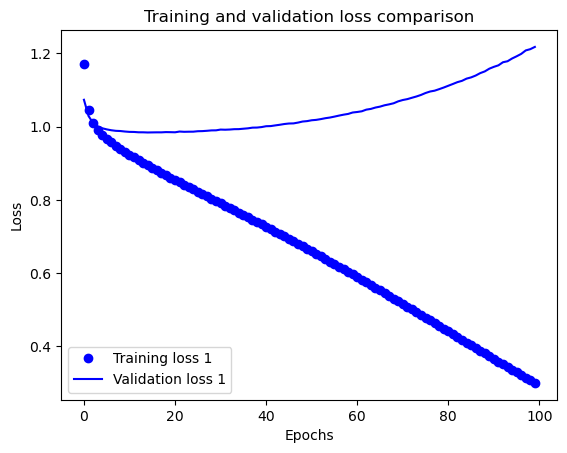

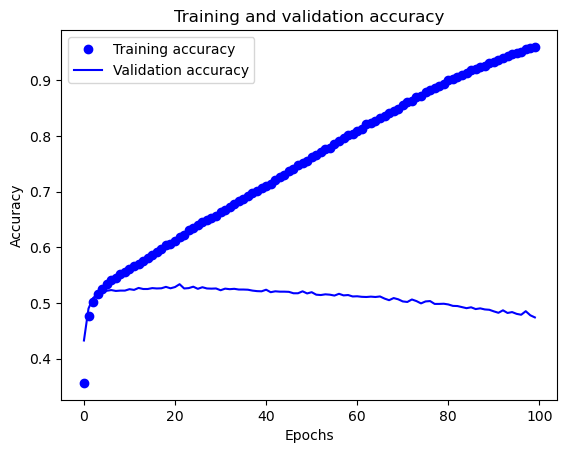

In [97]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [98]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 2ms/step - loss: 1.2766 - accuracy: 0.4614


123/123 [==============================] - 0s 1ms/step


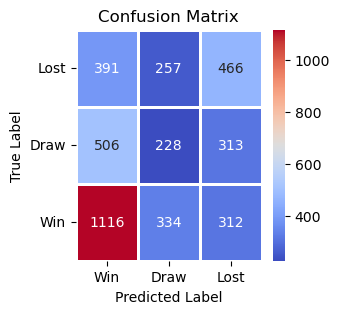

              precision    recall  f1-score   support

           0       0.55      0.63      0.59      1762
           1       0.28      0.22      0.24      1047
           2       0.43      0.42      0.42      1114

    accuracy                           0.46      3923
   macro avg       0.42      0.42      0.42      3923
weighted avg       0.44      0.46      0.45      3923



In [99]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Po zmniejszeniu learning_rate do 10^-5 nasz model później zaczyna się dopasowywać do danych, jednak nadal kuje to w oczy. W następnym kroku zwiększymy jeszcze bardziej złożoność naszego modelu

In [194]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(4, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 512)               443904    
                                                                 
 dense_118 (Dense)           (None, 256)               131328    
                                                                 
 dense_119 (Dense)           (None, 128)               32896     
                                                                 
 dense_120 (Dense)           (None, 64)                8256      
                                                                 
 dense_121 (Dense)           (None, 32)                2080      
                                                                 
 dense_122 (Dense)           (None, 16)                528       
                                                                 
 dense_123 (Dense)           (None, 8)               

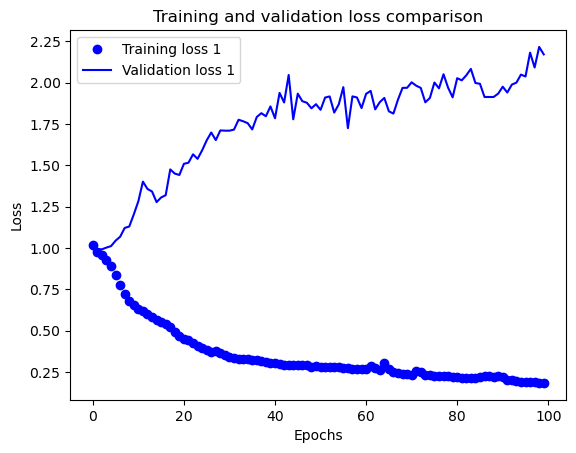

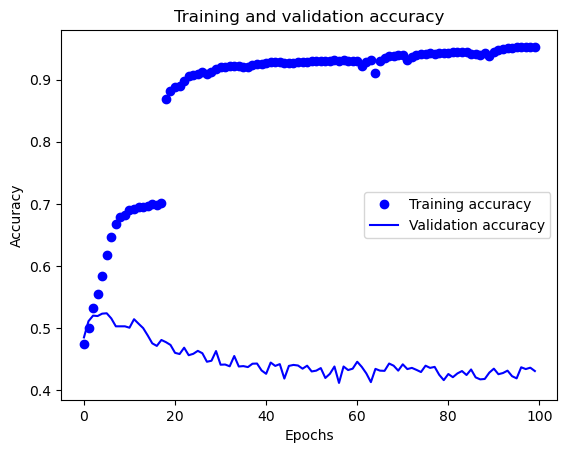

In [195]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 2ms/step


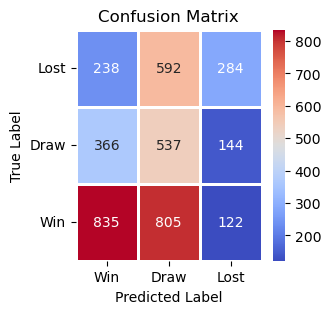

              precision    recall  f1-score   support

           0       0.58      0.47      0.52      1762
           1       0.28      0.51      0.36      1047
           2       0.52      0.25      0.34      1114

    accuracy                           0.42      3923
   macro avg       0.46      0.41      0.41      3923
weighted avg       0.48      0.42      0.43      3923



In [196]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Zwiększenie złożoności modelu nie pomogło. Model nadal się przeucza, ale teraz patrząc na macierz konfuzji widzimy, że rozregulował się jeszcze bardziej i strzela gdzie popadnie

In [197]:
model1 = models.Sequential()
model1.add(layers.Dense(256, activation='elu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(128, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(64, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(32, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(16, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(8, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 256)               221952    
                                                                 
 dropout_63 (Dropout)        (None, 256)               0         
                                                                 
 dense_127 (Dense)           (None, 128)               32896     
                                                                 
 dropout_64 (Dropout)        (None, 128)               0         
                                                                 
 dense_128 (Dense)           (None, 64)                8256      
                                                                 
 dropout_65 (Dropout)        (None, 64)                0         
                                                                 
 dense_129 (Dense)           (None, 32)              

Epoch 43/100
99/99 [==============================] - 1s 6ms/step - loss: 0.6537 - accuracy: 0.7117 - val_loss: 1.2482 - val_accuracy: 0.5003
Epoch 44/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6380 - accuracy: 0.7145 - val_loss: 1.2805 - val_accuracy: 0.4630
Epoch 45/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6286 - accuracy: 0.7199 - val_loss: 1.3105 - val_accuracy: 0.4790
Epoch 46/100
99/99 [==============================] - 1s 6ms/step - loss: 0.6238 - accuracy: 0.7215 - val_loss: 1.3292 - val_accuracy: 0.4672
Epoch 47/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6153 - accuracy: 0.7284 - val_loss: 1.3895 - val_accuracy: 0.4774
Epoch 48/100
99/99 [==============================] - 1s 6ms/step - loss: 0.5933 - accuracy: 0.7433 - val_loss: 1.5438 - val_accuracy: 0.4713
Epoch 49/100
99/99 [==============================] - 1s 6ms/step - loss: 0.5889 - accuracy: 0.7403 - val_loss: 1.3983 - val_accuracy: 0.4729
Epoch 

In [198]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 3ms/step - loss: 1.9775 - accuracy: 0.4420


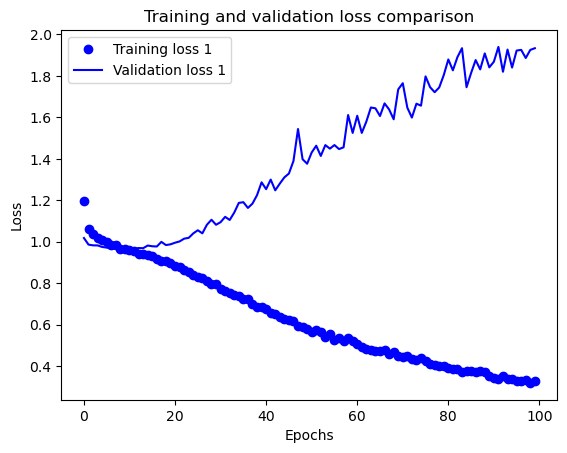

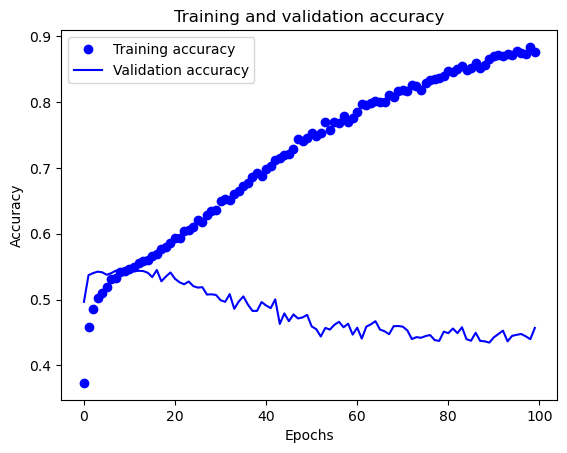

In [199]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 2ms/step


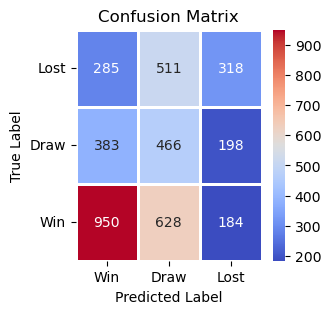

              precision    recall  f1-score   support

           0       0.59      0.54      0.56      1762
           1       0.29      0.45      0.35      1047
           2       0.45      0.29      0.35      1114

    accuracy                           0.44      3923
   macro avg       0.44      0.42      0.42      3923
weighted avg       0.47      0.44      0.45      3923



In [200]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Mozemy spróbować jeszcze bradziej zwiększyć złozoność modelu, jednocześnie zwiększając regularyzację, abu sprawdzić jak wpłynie to na wynik 
treningowy/walidacyjny. Wybieramy tutaj regularyzację L2, gdyz regularyzacja L1 moze prowadzic do całkowitego wyzerowania niektórych wag, 
a nie chcemy tak radykalnie odrzucać części danych  

Oprócz tego, mozemy spróbować zmniejszyć dropout. Losowe wyłączanie 30% neuronów w kazdej warstwie to dość duzo i moze utrudniać uczenie 
sieci. Spróbujmy zmniejszyć dropout do wartości 10%  

Ponadto, spróbujmy zmienić optymizer na Nadam, aby wziąć pod uwagę pęd zmiany gradientu. Aby jednak nasza sieć zbytnio nie 'skakała', 
zmniejszymy learning rate

In [201]:
from tensorflow.keras import regularizers

In [202]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 512)               443904    
                                                                 
 dropout_69 (Dropout)        (None, 512)               0         
                                                                 
 dense_135 (Dense)           (None, 256)               131328    
                                                                 
 dropout_70 (Dropout)        (None, 256)               0         
                                                                 
 dense_136 (Dense)           (None, 128)               32896     
                                                                 
 dropout_71 (Dropout)        (None, 128)               0         
                                                                 
 dense_137 (Dense)           (None, 64)              

99/99 [==============================] - 1s 12ms/step - loss: 1.0178 - accuracy: 0.5964 - val_loss: 1.1166 - val_accuracy: 0.5376
Epoch 98/100
99/99 [==============================] - 1s 12ms/step - loss: 1.0132 - accuracy: 0.6023 - val_loss: 1.1164 - val_accuracy: 0.5335
Epoch 99/100
99/99 [==============================] - 1s 12ms/step - loss: 1.0098 - accuracy: 0.6004 - val_loss: 1.1175 - val_accuracy: 0.5328
Epoch 100/100
99/99 [==============================] - 1s 11ms/step - loss: 1.0133 - accuracy: 0.5967 - val_loss: 1.1180 - val_accuracy: 0.5322


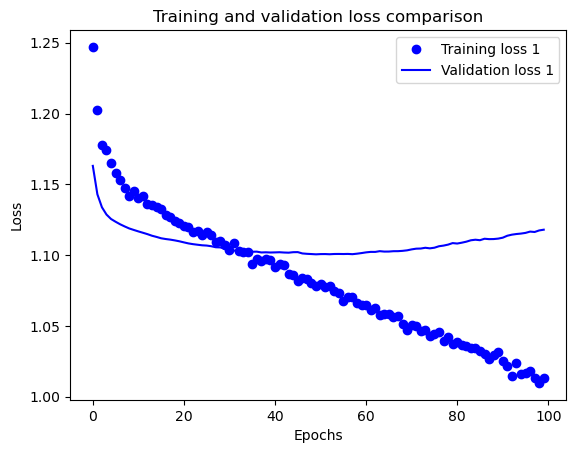

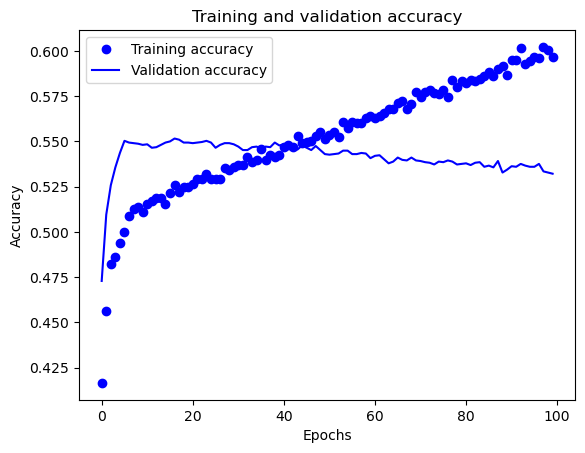

In [203]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


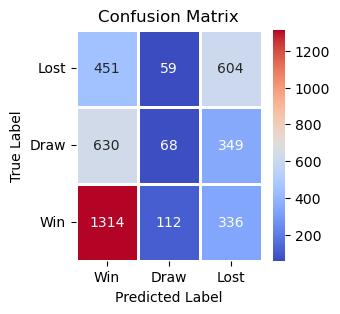

              precision    recall  f1-score   support

           0       0.55      0.75      0.63      1762
           1       0.28      0.06      0.11      1047
           2       0.47      0.54      0.50      1114

    accuracy                           0.51      3923
   macro avg       0.43      0.45      0.41      3923
weighted avg       0.46      0.51      0.45      3923



In [204]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Na powyższych wykresach widzimy, że po około 40 epokach nastąpił overfitting, a accuracy zbioru walidacyjnego nie wzrosło. Nauczmy ten sam model jeszcze raz, ale zatrzymajmy proces uczenia w momencie, kiedy model zacznie overfittować

In [205]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 40        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 512)               443904    
                                                                 
 dropout_76 (Dropout)        (None, 512)               0         
                                                                 
 dense_144 (Dense)           (None, 256)               131328    
                                                                 
 dropout_77 (Dropout)        (None, 256)               0         
                                                                 
 dense_145 (Dense)           (None, 128)               32896     
                                                                 
 dropout_78 (Dropout)        (None, 128)               0         
                                                                 
 dense_146 (Dense)           (None, 64)              

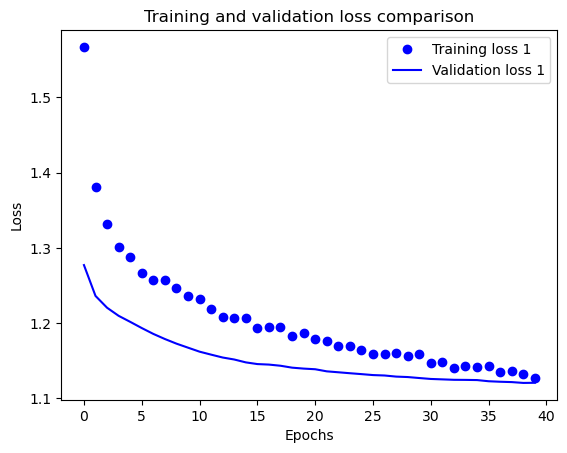

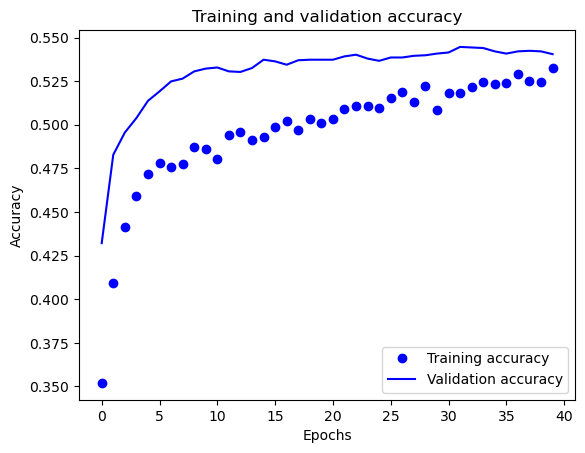

In [206]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


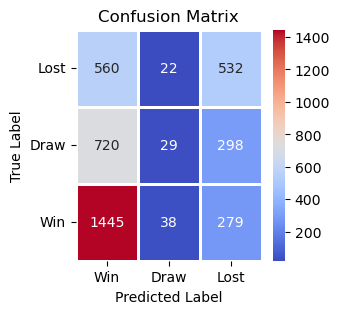

              precision    recall  f1-score   support

           0       0.53      0.82      0.64      1762
           1       0.33      0.03      0.05      1047
           2       0.48      0.48      0.48      1114

    accuracy                           0.51      3923
   macro avg       0.45      0.44      0.39      3923
weighted avg       0.46      0.51      0.44      3923



In [207]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Model teraz się nie przeuczył, ale widzimy, że dużo częściej występują zwycięstwa niż inne rezultaty. Poeksperymentujmy jeszcze z hiperparametrami i zobaczmy co jesteśmy w stanie z tego wyciągnąć. Delikatnie zwiększmy regularyzacje i liczbę epok

In [208]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 512)               443904    
                                                                 
 dropout_83 (Dropout)        (None, 512)               0         
                                                                 
 dense_153 (Dense)           (None, 256)               131328    
                                                                 
 dropout_84 (Dropout)        (None, 256)               0         
                                                                 
 dense_154 (Dense)           (None, 128)               32896     
                                                                 
 dropout_85 (Dropout)        (None, 128)               0         
                                                                 
 dense_155 (Dense)           (None, 64)              

99/99 [==============================] - 1s 12ms/step - loss: 1.0999 - accuracy: 0.5669 - val_loss: 1.1377 - val_accuracy: 0.5386
Epoch 98/100
99/99 [==============================] - 1s 12ms/step - loss: 1.1068 - accuracy: 0.5596 - val_loss: 1.1384 - val_accuracy: 0.5424
Epoch 99/100
99/99 [==============================] - 1s 13ms/step - loss: 1.1012 - accuracy: 0.5650 - val_loss: 1.1379 - val_accuracy: 0.5405
Epoch 100/100
99/99 [==============================] - 1s 13ms/step - loss: 1.1022 - accuracy: 0.5682 - val_loss: 1.1386 - val_accuracy: 0.5408


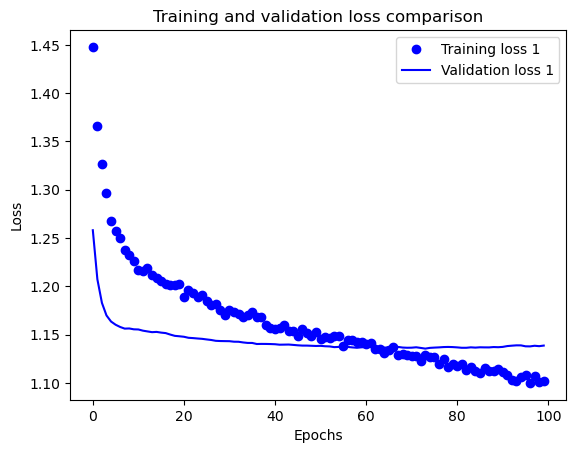

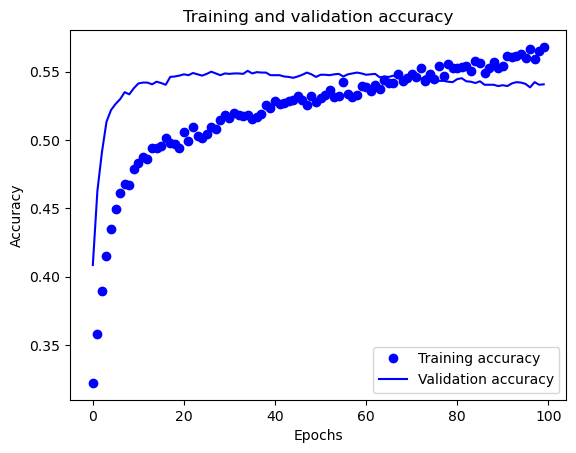

In [209]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Model znowu przeuczył się, ale później. Zmniejszmy liczbę epok i jeszcze raz popatrzmy na macierz konfuzji

In [210]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 75        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 512)               443904    
                                                                 
 dropout_90 (Dropout)        (None, 512)               0         
                                                                 
 dense_162 (Dense)           (None, 256)               131328    
                                                                 
 dropout_91 (Dropout)        (None, 256)               0         
                                                                 
 dense_163 (Dense)           (None, 128)               32896     
                                                                 
 dropout_92 (Dropout)        (None, 128)               0         
                                                                 
 dense_164 (Dense)           (None, 64)              

Epoch 41/75
99/99 [==============================] - 1s 11ms/step - loss: 1.1610 - accuracy: 0.5236 - val_loss: 1.1267 - val_accuracy: 0.5462
Epoch 42/75
99/99 [==============================] - 1s 11ms/step - loss: 1.1595 - accuracy: 0.5274 - val_loss: 1.1266 - val_accuracy: 0.5472
Epoch 43/75
99/99 [==============================] - 1s 11ms/step - loss: 1.1632 - accuracy: 0.5243 - val_loss: 1.1264 - val_accuracy: 0.5459
Epoch 44/75
99/99 [==============================] - 1s 12ms/step - loss: 1.1593 - accuracy: 0.5203 - val_loss: 1.1265 - val_accuracy: 0.5472
Epoch 45/75
99/99 [==============================] - 1s 11ms/step - loss: 1.1555 - accuracy: 0.5262 - val_loss: 1.1265 - val_accuracy: 0.5459
Epoch 46/75
99/99 [==============================] - 1s 11ms/step - loss: 1.1553 - accuracy: 0.5289 - val_loss: 1.1263 - val_accuracy: 0.5465
Epoch 47/75
99/99 [==============================] - 1s 11ms/step - loss: 1.1616 - accuracy: 0.5220 - val_loss: 1.1263 - val_accuracy: 0.5472
Epoch 

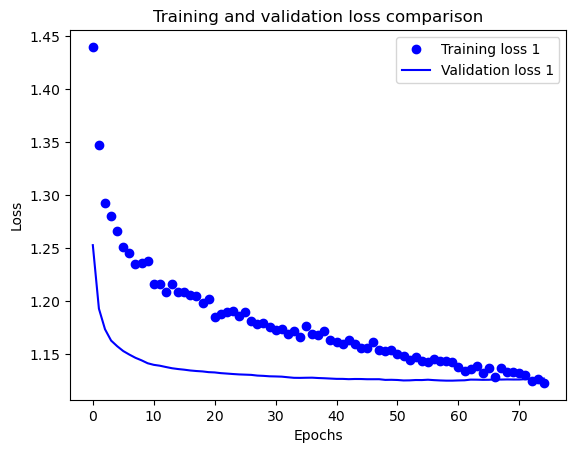

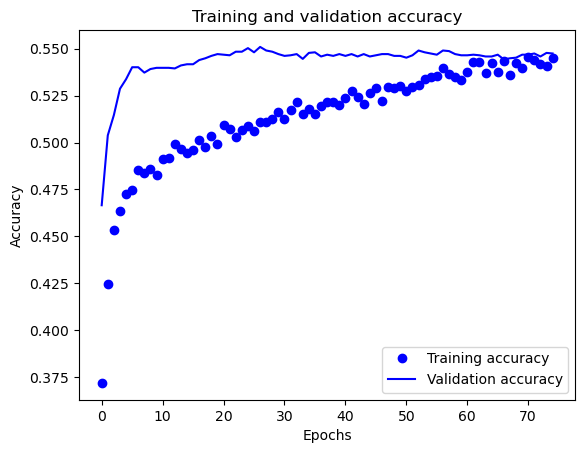

In [211]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [212]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 3ms/step - loss: 1.1687 - accuracy: 0.5154


123/123 [==============================] - 0s 1ms/step


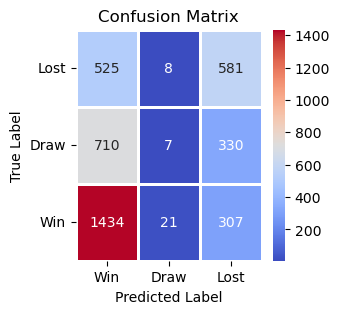

              precision    recall  f1-score   support

           0       0.54      0.81      0.65      1762
           1       0.19      0.01      0.01      1047
           2       0.48      0.52      0.50      1114

    accuracy                           0.52      3923
   macro avg       0.40      0.45      0.39      3923
weighted avg       0.43      0.52      0.44      3923



In [213]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

### Prostsza architektura sieci
Do tej pory zazwyczaj zaczynaliśmy juz od dość duzej liczby neuronów (512 na pierwszej warstwie).  
Tym razem spróbujemy znacznie uprościć model i zacząć od 64, oczywiści pamiętając, ze prawdopodobnie będzie nalezalo
wydłuzyć proces uczenia

In [214]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 300        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 64)                55488     
                                                                 
 dropout_97 (Dropout)        (None, 64)                0         
                                                                 
 dense_171 (Dense)           (None, 32)                2080      
                                                                 
 dropout_98 (Dropout)        (None, 32)                0         
                                                                 
 dense_172 (Dense)           (None, 16)                528       
                                                                 
 dropout_99 (Dropout)        (None, 16)                0         
                                                                 
 dense_173 (Dense)           (None, 8)               

99/99 [==============================] - 1s 9ms/step - loss: 0.9992 - accuracy: 0.5358 - val_loss: 1.0035 - val_accuracy: 0.5354
Epoch 104/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9995 - accuracy: 0.5353 - val_loss: 1.0033 - val_accuracy: 0.5357
Epoch 105/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9945 - accuracy: 0.5359 - val_loss: 1.0032 - val_accuracy: 0.5347
Epoch 106/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9925 - accuracy: 0.5431 - val_loss: 1.0030 - val_accuracy: 0.5347
Epoch 107/300
99/99 [==============================] - 1s 10ms/step - loss: 1.0013 - accuracy: 0.5356 - val_loss: 1.0029 - val_accuracy: 0.5341
Epoch 108/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9893 - accuracy: 0.5421 - val_loss: 1.0028 - val_accuracy: 0.5338
Epoch 109/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9901 - accuracy: 0.5411 - val_loss: 1.0025 - val_accuracy: 0.5341
Epoch 110/30

99/99 [==============================] - 1s 10ms/step - loss: 0.9466 - accuracy: 0.5698 - val_loss: 1.0008 - val_accuracy: 0.5347
Epoch 218/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9439 - accuracy: 0.5690 - val_loss: 1.0008 - val_accuracy: 0.5335
Epoch 219/300
99/99 [==============================] - 1s 11ms/step - loss: 0.9427 - accuracy: 0.5720 - val_loss: 1.0010 - val_accuracy: 0.5344
Epoch 220/300
99/99 [==============================] - 1s 10ms/step - loss: 0.9435 - accuracy: 0.5678 - val_loss: 1.0012 - val_accuracy: 0.5344
Epoch 221/300
99/99 [==============================] - 1s 11ms/step - loss: 0.9434 - accuracy: 0.5715 - val_loss: 1.0013 - val_accuracy: 0.5328
Epoch 222/300
99/99 [==============================] - 1s 11ms/step - loss: 0.9443 - accuracy: 0.5686 - val_loss: 1.0014 - val_accuracy: 0.5312
Epoch 223/300
99/99 [==============================] - 1s 12ms/step - loss: 0.9443 - accuracy: 0.5702 - val_loss: 1.0015 - val_accuracy: 0.5322
Epoch 2

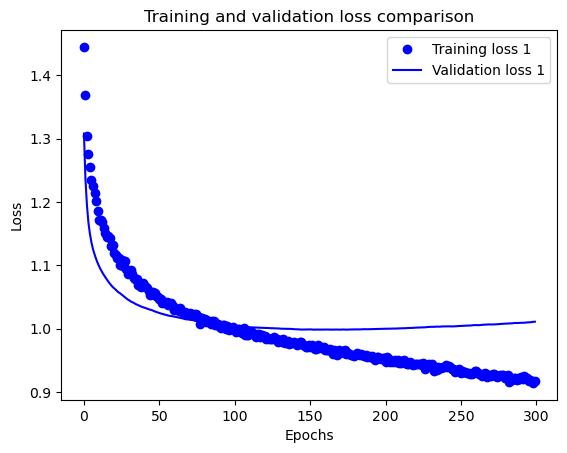

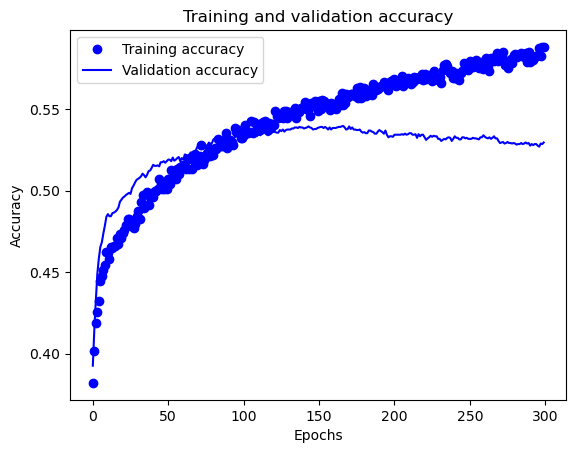

In [215]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [216]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 4ms/step - loss: 1.0548 - accuracy: 0.5068


123/123 [==============================] - 0s 3ms/step


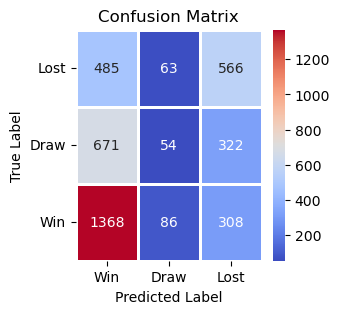

              precision    recall  f1-score   support

           0       0.54      0.78      0.64      1762
           1       0.27      0.05      0.09      1047
           2       0.47      0.51      0.49      1114

    accuracy                           0.51      3923
   macro avg       0.43      0.45      0.40      3923
weighted avg       0.45      0.51      0.45      3923



In [217]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Póki co wyniki nie są lepsze od poprzednich rozwiązań, a nawet przeciwnie. Teraz więc spróbujemy zastosować bardziej 
skomplikowany kształt sieci - romb. Złozoność sieci znów wzrasta, więc ponownie zmniejszamy liczbę epok do 100

In [218]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(512, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 64)                55488     
                                                                 
 dropout_101 (Dropout)       (None, 64)                0         
                                                                 
 dense_177 (Dense)           (None, 128)               8320      
                                                                 
 dropout_102 (Dropout)       (None, 128)               0         
                                                                 
 dense_178 (Dense)           (None, 256)               33024     
                                                                 
 dropout_103 (Dropout)       (None, 256)               0         
                                                                 
 dense_179 (Dense)           (None, 512)             

99/99 [==============================] - 1s 15ms/step - loss: 1.2120 - accuracy: 0.5079 - val_loss: 1.1729 - val_accuracy: 0.5516
Epoch 36/100
99/99 [==============================] - 1s 14ms/step - loss: 1.2128 - accuracy: 0.5039 - val_loss: 1.1722 - val_accuracy: 0.5523
Epoch 37/100
99/99 [==============================] - 1s 14ms/step - loss: 1.2114 - accuracy: 0.5060 - val_loss: 1.1718 - val_accuracy: 0.5523
Epoch 38/100
99/99 [==============================] - 1s 15ms/step - loss: 1.2074 - accuracy: 0.5087 - val_loss: 1.1718 - val_accuracy: 0.5529
Epoch 39/100
99/99 [==============================] - 2s 15ms/step - loss: 1.2107 - accuracy: 0.5063 - val_loss: 1.1713 - val_accuracy: 0.5539
Epoch 40/100
99/99 [==============================] - 1s 14ms/step - loss: 1.2076 - accuracy: 0.5064 - val_loss: 1.1707 - val_accuracy: 0.5532
Epoch 41/100
99/99 [==============================] - 1s 15ms/step - loss: 1.2050 - accuracy: 0.5075 - val_loss: 1.1703 - val_accuracy: 0.5535
Epoch 42/100

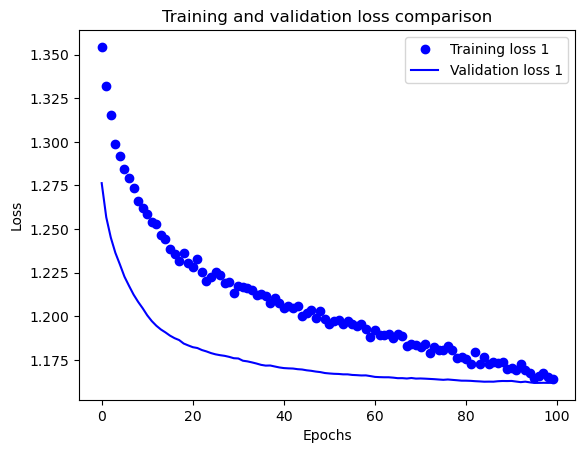

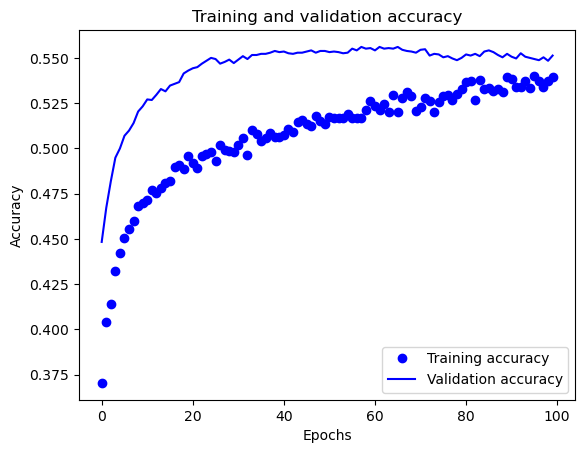

In [219]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [220]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 4ms/step - loss: 1.1946 - accuracy: 0.5096


123/123 [==============================] - 0s 2ms/step


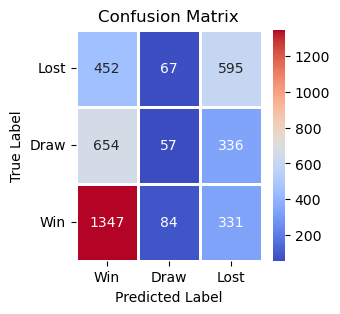

              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1762
           1       0.27      0.05      0.09      1047
           2       0.47      0.53      0.50      1114

    accuracy                           0.51      3923
   macro avg       0.43      0.45      0.41      3923
weighted avg       0.45      0.51      0.45      3923



In [221]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

W przypadku rombu, mamy juz ponownie lepsze wyniki, jednak są w granicach tego co otrzymywaliśmy wcześniej. Teraz więc, spróbujemy 
"uciąć" romb w połowie.

In [52]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(512, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 80        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

NameError: name 'regularizers' is not defined

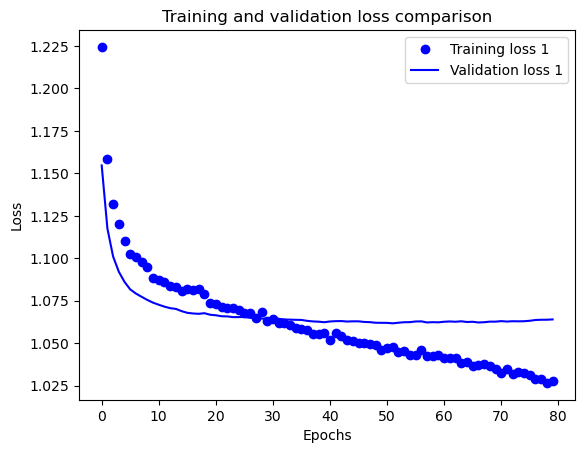

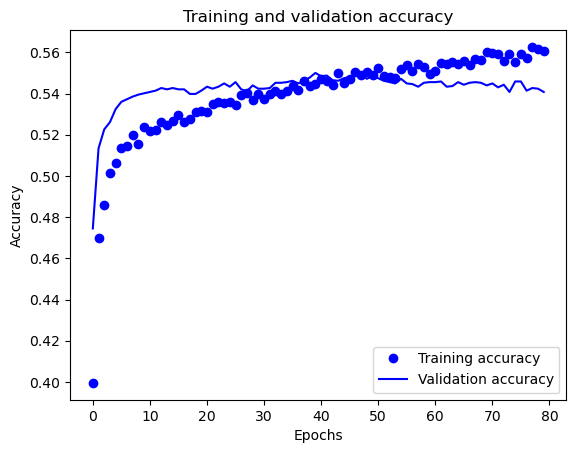

In [223]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [224]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 1s 4ms/step - loss: 1.1036 - accuracy: 0.5177


123/123 [==============================] - 0s 2ms/step


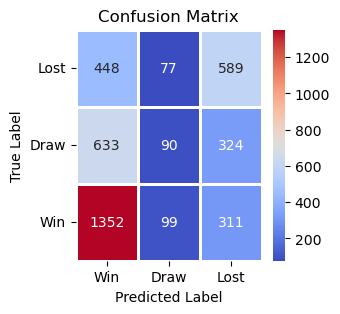

              precision    recall  f1-score   support

           0       0.56      0.77      0.64      1762
           1       0.34      0.09      0.14      1047
           2       0.48      0.53      0.50      1114

    accuracy                           0.52      3923
   macro avg       0.46      0.46      0.43      3923
weighted avg       0.48      0.52      0.47      3923



In [225]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Teraz spróbujmy zacząć od jeszcze mniejszej liczby neuronów, np. 32

In [226]:
model1 = models.Sequential()
model1.add(layers.Dense(32, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(512, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 80        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_193 (Dense)           (None, 32)                27744     
                                                                 
 dropout_114 (Dropout)       (None, 32)                0         
                                                                 
 dense_194 (Dense)           (None, 64)                2112      
                                                                 
 dropout_115 (Dropout)       (None, 64)                0         
                                                                 
 dense_195 (Dense)           (None, 128)               8320      
                                                                 
 dropout_116 (Dropout)       (None, 128)               0         
                                                                 
 dense_196 (Dense)           (None, 256)             

Epoch 47/80
99/99 [==============================] - 1s 9ms/step - loss: 1.0641 - accuracy: 0.5385 - val_loss: 1.0584 - val_accuracy: 0.5465
Epoch 48/80
99/99 [==============================] - 1s 9ms/step - loss: 1.0627 - accuracy: 0.5396 - val_loss: 1.0585 - val_accuracy: 0.5468
Epoch 49/80
99/99 [==============================] - 1s 9ms/step - loss: 1.0603 - accuracy: 0.5420 - val_loss: 1.0580 - val_accuracy: 0.5468
Epoch 50/80
99/99 [==============================] - 1s 9ms/step - loss: 1.0620 - accuracy: 0.5397 - val_loss: 1.0578 - val_accuracy: 0.5459
Epoch 51/80
99/99 [==============================] - 1s 9ms/step - loss: 1.0606 - accuracy: 0.5399 - val_loss: 1.0575 - val_accuracy: 0.5478
Epoch 52/80
99/99 [==============================] - 1s 9ms/step - loss: 1.0604 - accuracy: 0.5386 - val_loss: 1.0575 - val_accuracy: 0.5475
Epoch 53/80
99/99 [==============================] - 1s 9ms/step - loss: 1.0602 - accuracy: 0.5444 - val_loss: 1.0575 - val_accuracy: 0.5459
Epoch 54/80
9

In [227]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 3ms/step - loss: 1.0879 - accuracy: 0.5190


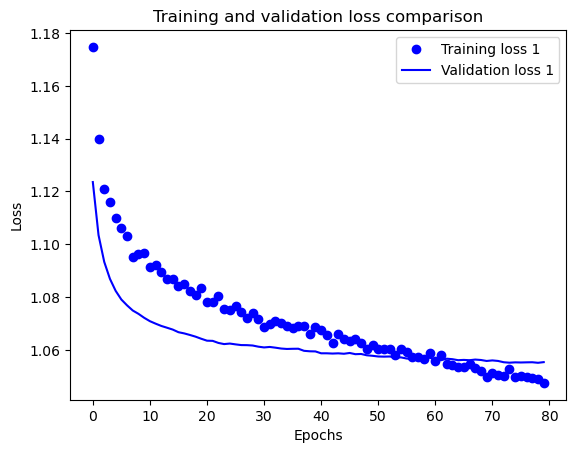

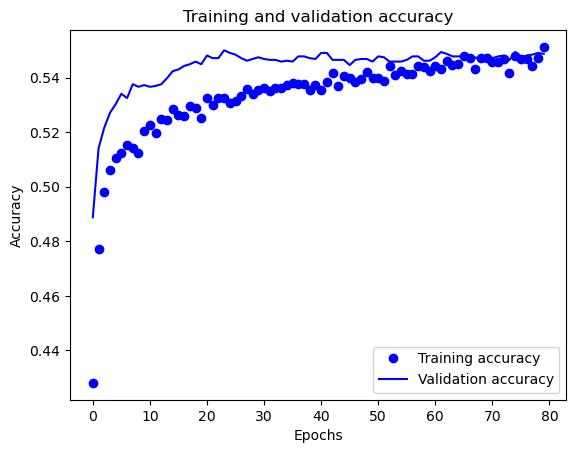

In [228]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


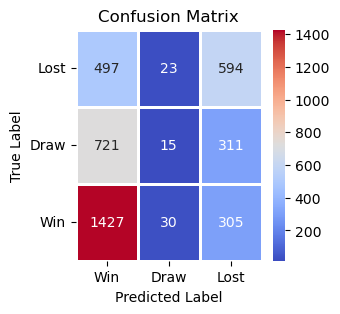

              precision    recall  f1-score   support

           0       0.54      0.81      0.65      1762
           1       0.22      0.01      0.03      1047
           2       0.49      0.53      0.51      1114

    accuracy                           0.52      3923
   macro avg       0.42      0.45      0.40      3923
weighted avg       0.44      0.52      0.44      3923



In [229]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Udało nam się przekroczyć 55% na zbiorze walidacyjnym i jest to najlepszy jak dotąd wynik!  

Warto równiez zauwazyć, ze przy tym modelu przez wiekszosc procesu uczenia, wynik walidacyjny byl lepszy niz treningowy, co jest 
dość niecodzienną sytuacją. Mozemy więc spróbować wytrenować model na większej ilości epok, np. 300 i zobaczyć, czy wynik będzie dalej 
rósł.

In [230]:
model1 = models.Sequential()
model1.add(layers.Dense(32, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(512, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 300        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_199 (Dense)           (None, 32)                27744     
                                                                 
 dropout_118 (Dropout)       (None, 32)                0         
                                                                 
 dense_200 (Dense)           (None, 64)                2112      
                                                                 
 dropout_119 (Dropout)       (None, 64)                0         
                                                                 
 dense_201 (Dense)           (None, 128)               8320      
                                                                 
 dropout_120 (Dropout)       (None, 128)               0         
                                                                 
 dense_202 (Dense)           (None, 256)             

99/99 [==============================] - 1s 10ms/step - loss: 1.0411 - accuracy: 0.5493 - val_loss: 1.0606 - val_accuracy: 0.5433
Epoch 104/300
99/99 [==============================] - 1s 10ms/step - loss: 1.0381 - accuracy: 0.5499 - val_loss: 1.0608 - val_accuracy: 0.5433
Epoch 105/300
99/99 [==============================] - 1s 10ms/step - loss: 1.0357 - accuracy: 0.5496 - val_loss: 1.0612 - val_accuracy: 0.5437
Epoch 106/300
99/99 [==============================] - 1s 9ms/step - loss: 1.0362 - accuracy: 0.5489 - val_loss: 1.0611 - val_accuracy: 0.5440
Epoch 107/300
99/99 [==============================] - 1s 9ms/step - loss: 1.0375 - accuracy: 0.5533 - val_loss: 1.0604 - val_accuracy: 0.5437
Epoch 108/300
99/99 [==============================] - 1s 9ms/step - loss: 1.0362 - accuracy: 0.5531 - val_loss: 1.0605 - val_accuracy: 0.5417
Epoch 109/300
99/99 [==============================] - 1s 9ms/step - loss: 1.0360 - accuracy: 0.5542 - val_loss: 1.0606 - val_accuracy: 0.5449
Epoch 110/

99/99 [==============================] - 1s 9ms/step - loss: 0.9943 - accuracy: 0.5775 - val_loss: 1.0756 - val_accuracy: 0.5338
Epoch 218/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9948 - accuracy: 0.5757 - val_loss: 1.0759 - val_accuracy: 0.5347
Epoch 219/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9930 - accuracy: 0.5790 - val_loss: 1.0767 - val_accuracy: 0.5338
Epoch 220/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9953 - accuracy: 0.5764 - val_loss: 1.0769 - val_accuracy: 0.5293
Epoch 221/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9939 - accuracy: 0.5766 - val_loss: 1.0767 - val_accuracy: 0.5296
Epoch 222/300
99/99 [==============================] - 1s 9ms/step - loss: 0.9915 - accuracy: 0.5819 - val_loss: 1.0771 - val_accuracy: 0.5306
Epoch 223/300
99/99 [==============================] - 1s 10ms/step - loss: 0.9924 - accuracy: 0.5770 - val_loss: 1.0778 - val_accuracy: 0.5296
Epoch 224/30

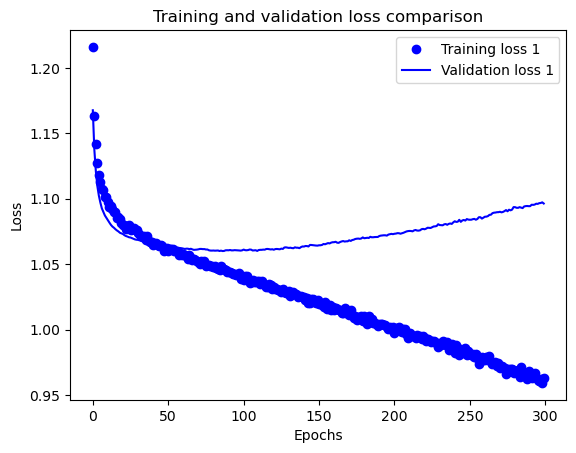

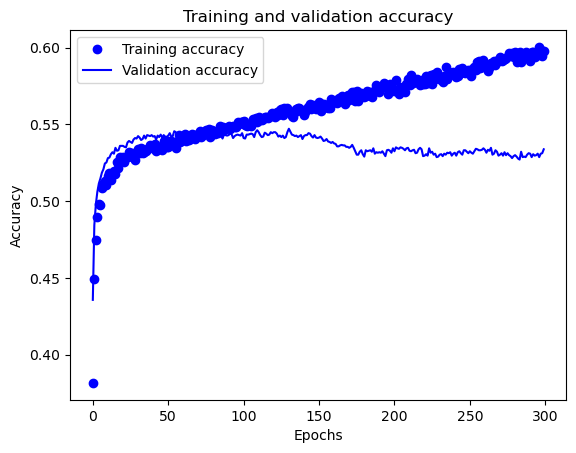

In [231]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Niestety widzimy, ze po przekroczeniu ok. 100 epok model zaczyna się przeuczać i jego wynik na zbiorze walidacyjnym zaczyna 
spadać, mimo ze wynik treningowy cały czas rośnie. Oznacza to, ze 55% nadal pozostaje naszym najlepszym wynikiem.

In [232]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 2ms/step - loss: 1.1268 - accuracy: 0.4935


## Jeszcze prostszy model
Przy ilości atrybutów, które mamy nie potrzebnie używamy, aż tyle neuronów na warstwie. Podejdźmy jeszcze do tego problemu inaczej, jeszcze bardziej upraszczając nasze model

In [233]:
model1 = models.Sequential()
model1.add(layers.Dense(2, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(2, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_205 (Dense)           (None, 2)                 1734      
                                                                 
 dropout_122 (Dropout)       (None, 2)                 0         
                                                                 
 dense_206 (Dense)           (None, 4)                 12        
                                                                 
 dropout_123 (Dropout)       (None, 4)                 0         
                                                                 
 dense_207 (Dense)           (None, 8)                 40        
                                                                 
 dropout_124 (Dropout)       (None, 8)                 0         
                                                                 
 dense_208 (Dense)           (None, 4)               

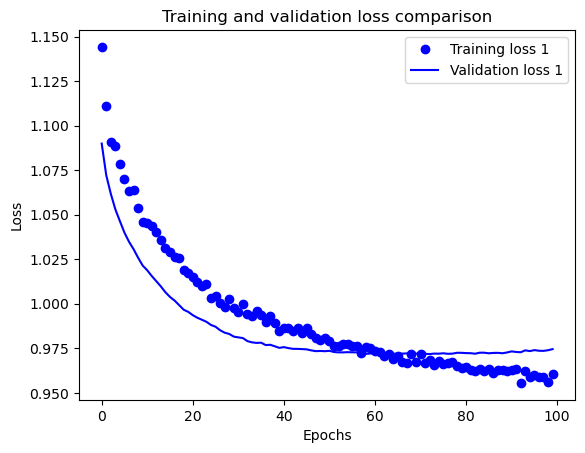

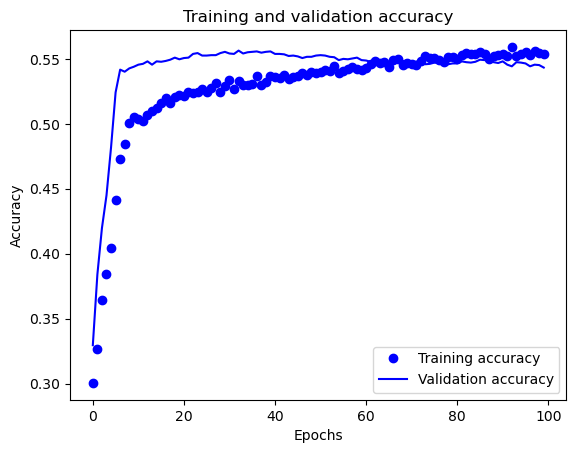

In [234]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [235]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 3ms/step - loss: 1.0065 - accuracy: 0.5185


123/123 [==============================] - 0s 1ms/step


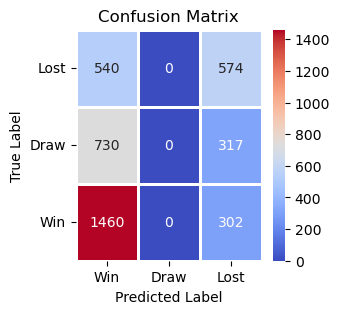

              precision    recall  f1-score   support

           0       0.53      0.83      0.65      1762
           1       0.00      0.00      0.00      1047
           2       0.48      0.52      0.50      1114

    accuracy                           0.52      3923
   macro avg       0.34      0.45      0.38      3923
weighted avg       0.38      0.52      0.43      3923



D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Usuńmy dwie jeszcze warstwy

In [237]:
model1 = models.Sequential()
model1.add(layers.Dense(2, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(2, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 2)                 1734      
                                                                 
 dropout_126 (Dropout)       (None, 2)                 0         
                                                                 
 dense_212 (Dense)           (None, 4)                 12        
                                                                 
 dropout_127 (Dropout)       (None, 4)                 0         
                                                                 
 dense_213 (Dense)           (None, 2)                 10        
                                                                 
 dense_214 (Dense)           (None, 3)                 9         
                                                                 
Total params: 1,765
Trainable params: 1,765
Non-train

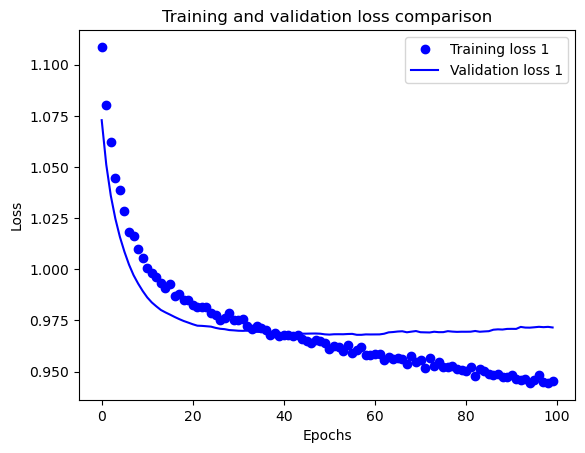

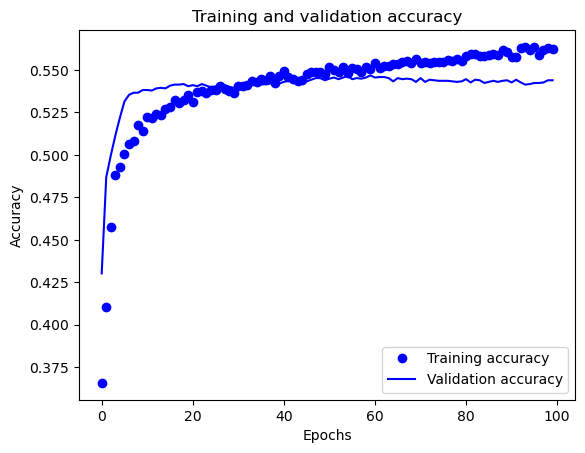

In [238]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 2ms/step


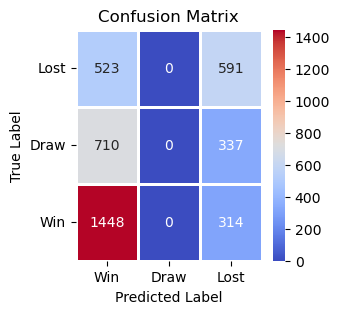

              precision    recall  f1-score   support

           0       0.54      0.82      0.65      1762
           1       0.00      0.00      0.00      1047
           2       0.48      0.53      0.50      1114

    accuracy                           0.52      3923
   macro avg       0.34      0.45      0.38      3923
weighted avg       0.38      0.52      0.44      3923



D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [239]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Zmniejszenie liczby warstw

In [240]:
model1 = models.Sequential()
model1.add(layers.Dense(2, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_215 (Dense)           (None, 2)                 1734      
                                                                 
 dropout_128 (Dropout)       (None, 2)                 0         
                                                                 
 dense_216 (Dense)           (None, 4)                 12        
                                                                 
 dropout_129 (Dropout)       (None, 4)                 0         
                                                                 
 dense_217 (Dense)           (None, 3)                 15        
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
99/99 [==============================] 

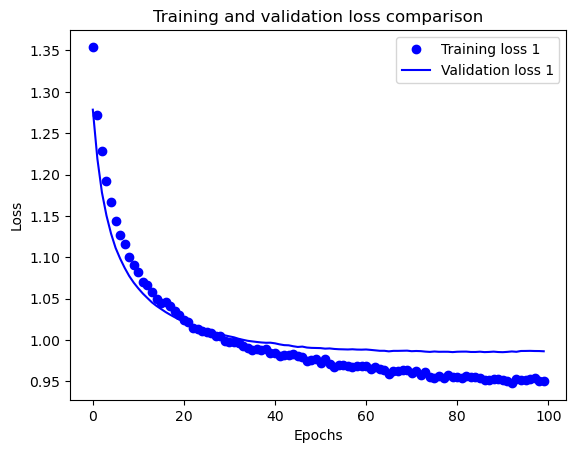

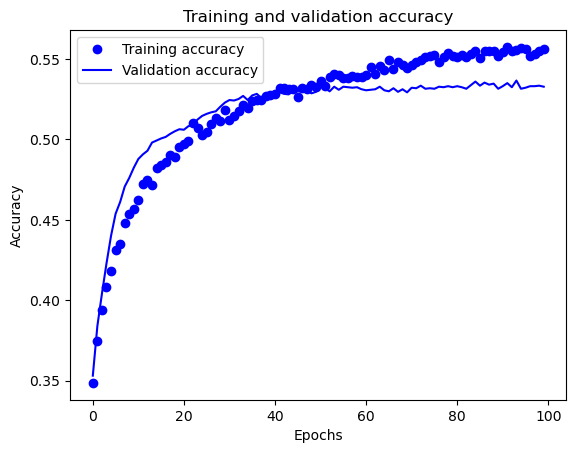

In [241]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 2ms/step


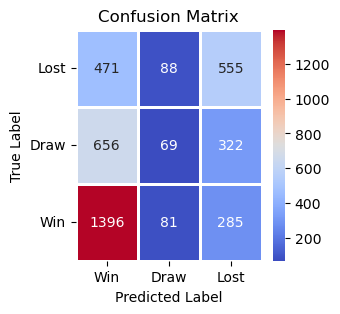

              precision    recall  f1-score   support

           0       0.55      0.79      0.65      1762
           1       0.29      0.07      0.11      1047
           2       0.48      0.50      0.49      1114

    accuracy                           0.51      3923
   macro avg       0.44      0.45      0.42      3923
weighted avg       0.46      0.51      0.46      3923



In [242]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Widzimy, że wykres zaczął się wypłaszczać, co się stanie, gdy zmniejszy liczbe neuronów na środowej warstwie?

In [243]:
model1 = models.Sequential()
model1.add(layers.Dense(2, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(3, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_218 (Dense)           (None, 2)                 1734      
                                                                 
 dropout_130 (Dropout)       (None, 2)                 0         
                                                                 
 dense_219 (Dense)           (None, 3)                 9         
                                                                 
 dropout_131 (Dropout)       (None, 3)                 0         
                                                                 
 dense_220 (Dense)           (None, 3)                 12        
                                                                 
Total params: 1,755
Trainable params: 1,755
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
99/99 [==============================] 

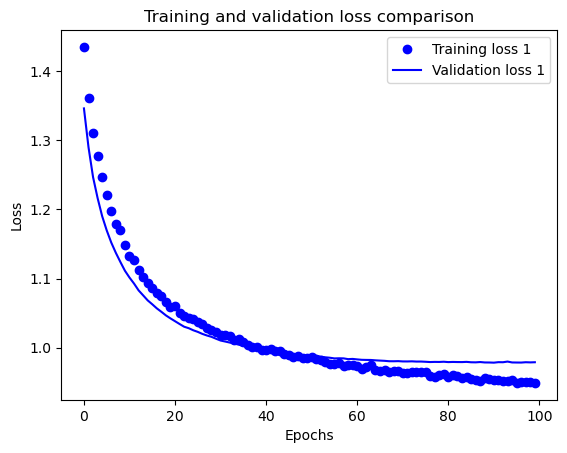

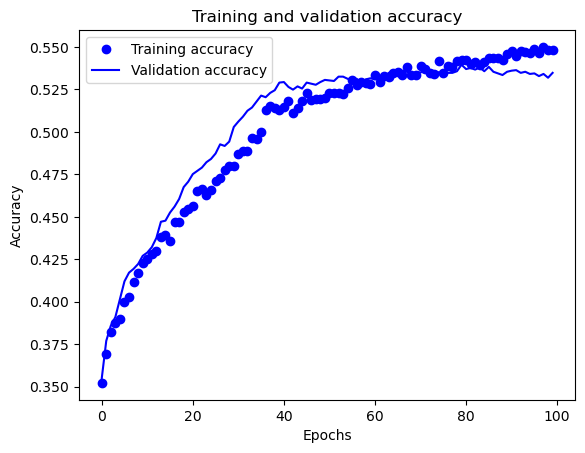

In [244]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


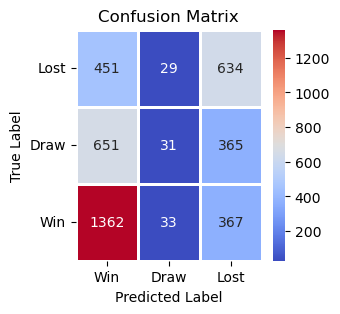

              precision    recall  f1-score   support

           0       0.55      0.77      0.64      1762
           1       0.33      0.03      0.05      1047
           2       0.46      0.57      0.51      1114

    accuracy                           0.52      3923
   macro avg       0.45      0.46      0.40      3923
weighted avg       0.47      0.52      0.45      3923



In [245]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Sieć rozpoznaje 2 razy mniej remisów niż poprzednia, wróćmy do poprzedniej i sprawdźmy co możemy w niej zmodyfikować. Spróbujmy usunąć regularyzatory

In [41]:
model1 = models.Sequential()
model1.add(layers.Dense(2, activation='elu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(3, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 1734      
                                                                 
 dense_13 (Dense)            (None, 3)                 9         
                                                                 
 dense_14 (Dense)            (None, 3)                 12        
                                                                 
Total params: 1,755
Trainable params: 1,755
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
99/99 [==============================] - 1s 7ms/step - loss: 1.1158 - accuracy: 0.4090 - val_loss: 1.0773 - val_accuracy: 0.4156
Epoch 2/100
99/99 [==============================] - 1s 5ms/step - loss: 1.0718 - accuracy: 0.4271 - val_loss: 1.0540 - val_accuracy: 0.4187
Epoch 3/100
99/99 [===============

99/99 [==============================] - 1s 6ms/step - loss: 0.9471 - accuracy: 0.5527 - val_loss: 0.9913 - val_accuracy: 0.5351
Epoch 54/100
99/99 [==============================] - 1s 5ms/step - loss: 0.9465 - accuracy: 0.5533 - val_loss: 0.9910 - val_accuracy: 0.5357
Epoch 55/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9459 - accuracy: 0.5539 - val_loss: 0.9911 - val_accuracy: 0.5335
Epoch 56/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9452 - accuracy: 0.5544 - val_loss: 0.9911 - val_accuracy: 0.5322
Epoch 57/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9446 - accuracy: 0.5541 - val_loss: 0.9908 - val_accuracy: 0.5338
Epoch 58/100
99/99 [==============================] - 1s 5ms/step - loss: 0.9442 - accuracy: 0.5543 - val_loss: 0.9907 - val_accuracy: 0.5328
Epoch 59/100
99/99 [==============================] - 1s 5ms/step - loss: 0.9436 - accuracy: 0.5556 - val_loss: 0.9909 - val_accuracy: 0.5322
Epoch 60/100
99/99 

In [42]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 2ms/step - loss: 1.0277 - accuracy: 0.5024


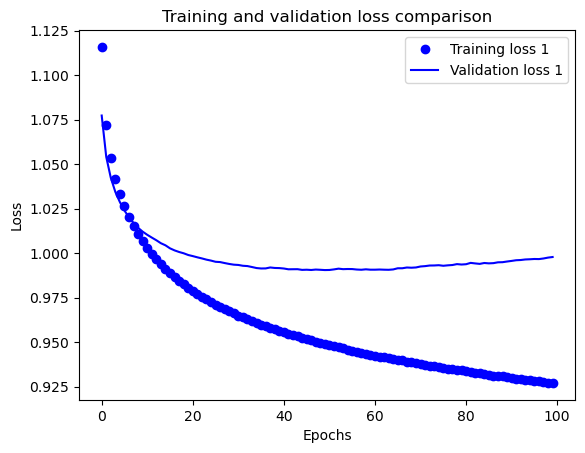

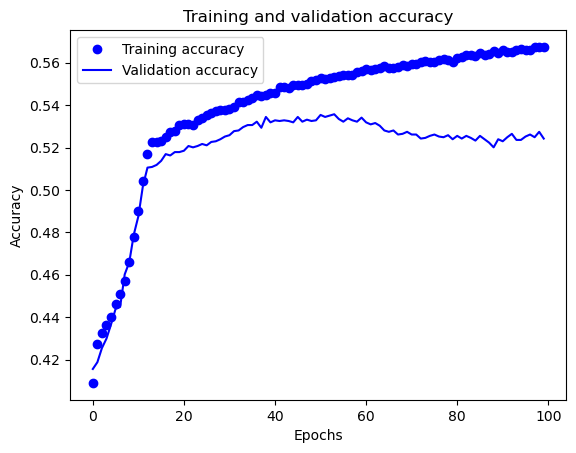

In [43]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


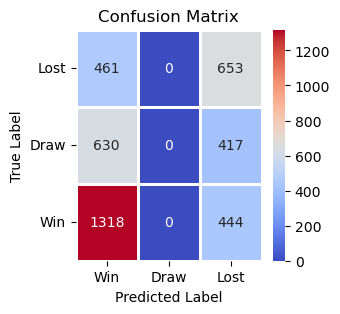

              precision    recall  f1-score   support

           0       0.55      0.75      0.63      1762
           1       0.00      0.00      0.00      1047
           2       0.43      0.59      0.50      1114

    accuracy                           0.50      3923
   macro avg       0.33      0.44      0.38      3923
weighted avg       0.37      0.50      0.42      3923



D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Po usunięciu regularyzatorów nasza sieć się przeucza i przestała rozpoznawać remisy. Zmniejszmy ilość remisów na środkowej warstwie aby zmniejszyć złożoność modelu

In [45]:
model1 = models.Sequential()
model1.add(layers.Dense(1, activation='elu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(2, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the numbear of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 867       
                                                                 
 dense_16 (Dense)            (None, 2)                 4         
                                                                 
 dense_17 (Dense)            (None, 3)                 9         
                                                                 
Total params: 880
Trainable params: 880
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
99/99 [==============================] - 1s 8ms/step - loss: 1.1615 - accuracy: 0.3607 - val_loss: 1.1512 - val_accuracy: 0.3658
Epoch 2/100
99/99 [==============================] - 1s 6ms/step - loss: 1.1452 - accuracy: 0.3799 - val_loss: 1.1388 - val_accuracy: 0.3834
Epoch 3/100
99/99 [===================

99/99 [==============================] - 1s 6ms/step - loss: 0.9846 - accuracy: 0.5406 - val_loss: 0.9895 - val_accuracy: 0.5430
Epoch 54/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9831 - accuracy: 0.5408 - val_loss: 0.9881 - val_accuracy: 0.5440
Epoch 55/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9816 - accuracy: 0.5415 - val_loss: 0.9867 - val_accuracy: 0.5433
Epoch 56/100
99/99 [==============================] - 1s 5ms/step - loss: 0.9802 - accuracy: 0.5416 - val_loss: 0.9856 - val_accuracy: 0.5440
Epoch 57/100
99/99 [==============================] - 1s 5ms/step - loss: 0.9789 - accuracy: 0.5426 - val_loss: 0.9843 - val_accuracy: 0.5443
Epoch 58/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9776 - accuracy: 0.5444 - val_loss: 0.9830 - val_accuracy: 0.5437
Epoch 59/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9764 - accuracy: 0.5449 - val_loss: 0.9817 - val_accuracy: 0.5453
Epoch 60/100
99/99 

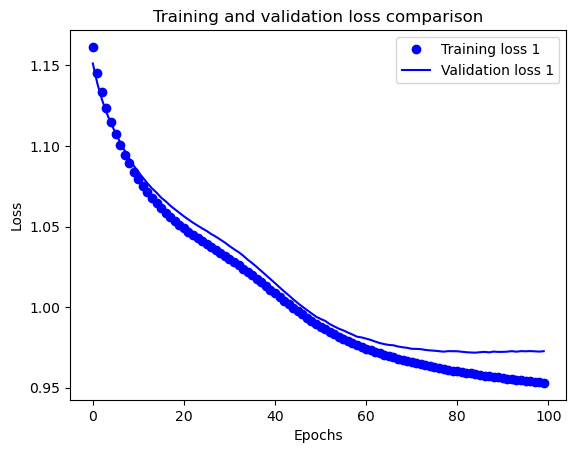

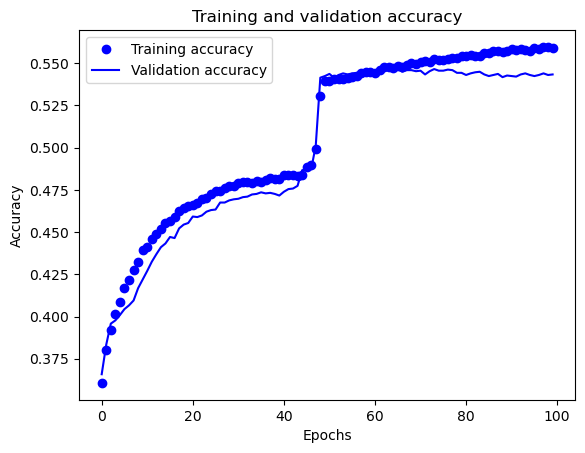

In [46]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


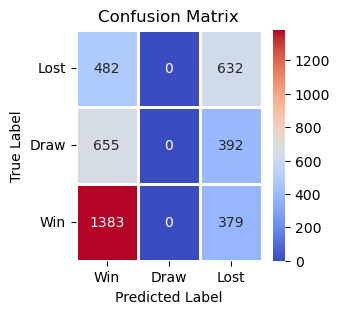

              precision    recall  f1-score   support

           0       0.55      0.78      0.65      1762
           1       0.00      0.00      0.00      1047
           2       0.45      0.57      0.50      1114

    accuracy                           0.51      3923
   macro avg       0.33      0.45      0.38      3923
weighted avg       0.37      0.51      0.43      3923



D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Nasz model przestał się przeuczać, ale nadal accuracy i rozpoznawalność remisów się nie zmieniła. Podejdźmy do problemu jeszcze inaczej. Wiemy, że nasze dane składają się z wektorów z atrybutami zawodników oraz drużyn. Ustawmy na początkową warstwe 24 neurony (22 zawodników + 2 drużyny, czyli po 12 na zespołów). Następnie dajmy 2 neurony (2 drużyny) i na podstawie tych informacji dokonajmy predykcji

In [48]:
model1 = models.Sequential()
model1.add(layers.Dense(3, activation='elu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(2, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the numbear of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 3)                 2601      
                                                                 
 dense_19 (Dense)            (None, 2)                 8         
                                                                 
 dense_20 (Dense)            (None, 3)                 9         
                                                                 
Total params: 2,618
Trainable params: 2,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
99/99 [==============================] - 1s 8ms/step - loss: 1.2387 - accuracy: 0.3407 - val_loss: 1.1963 - val_accuracy: 0.3445
Epoch 2/100
99/99 [==============================] - 1s 6ms/step - loss: 1.1728 - accuracy: 0.3743 - val_loss: 1.1489 - val_accuracy: 0.3681
Epoch 3/100
99/99 [===============

99/99 [==============================] - 1s 7ms/step - loss: 0.9371 - accuracy: 0.5700 - val_loss: 0.9766 - val_accuracy: 0.5379
Epoch 54/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9362 - accuracy: 0.5698 - val_loss: 0.9763 - val_accuracy: 0.5370
Epoch 55/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9351 - accuracy: 0.5712 - val_loss: 0.9767 - val_accuracy: 0.5373
Epoch 56/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9346 - accuracy: 0.5709 - val_loss: 0.9768 - val_accuracy: 0.5351
Epoch 57/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9335 - accuracy: 0.5724 - val_loss: 0.9773 - val_accuracy: 0.5373
Epoch 58/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9328 - accuracy: 0.5710 - val_loss: 0.9775 - val_accuracy: 0.5376
Epoch 59/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9321 - accuracy: 0.5728 - val_loss: 0.9778 - val_accuracy: 0.5392
Epoch 60/100
99/99 

In [ ]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [ ]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Model szybko zaczął się przeucząć, dodajmy dropouty między warstwami

In [100]:
model1 = models.Sequential()
model1.add(layers.Dense(3, activation='elu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(2, activation='elu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the numbear of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 3)                 2601      
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_36 (Dense)            (None, 2)                 8         
                                                                 
 dropout_3 (Dropout)         (None, 2)                 0         
                                                                 
 dense_37 (Dense)            (None, 3)                 9         
                                                                 
Total params: 2,618
Trainable params: 2,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
99/99 [==============================] 

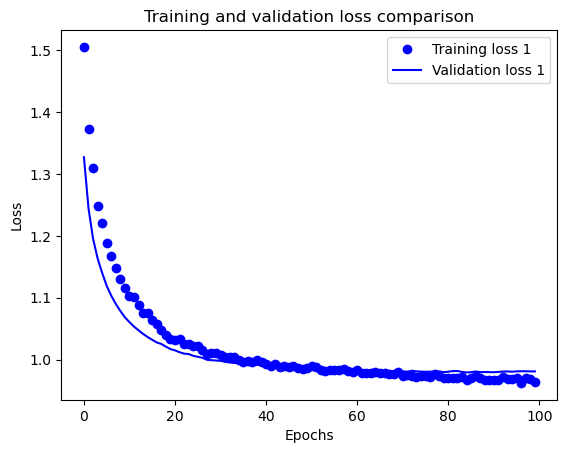

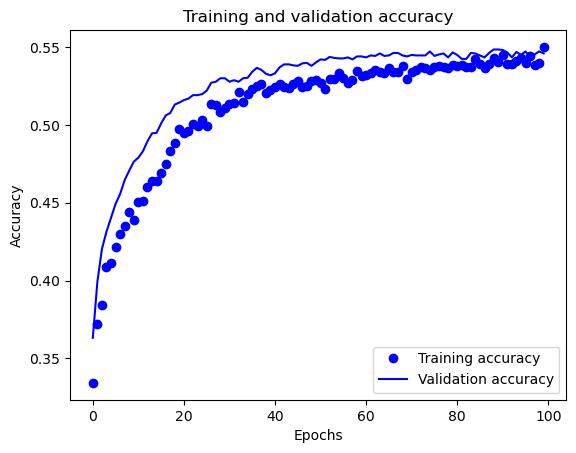

In [101]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


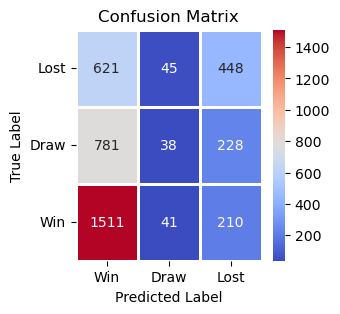

              precision    recall  f1-score   support

           0       0.52      0.86      0.65      1762
           1       0.31      0.04      0.06      1047
           2       0.51      0.40      0.45      1114

    accuracy                           0.51      3923
   macro avg       0.44      0.43      0.39      3923
weighted avg       0.46      0.51      0.43      3923



In [102]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

A co gdy od razu przejdziemy do 2 neuronów?

In [30]:
model1 = models.Sequential()
model1.add(layers.Dense(2, activation='elu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 300        # the numbear of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1734      
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 1,743
Trainable params: 1,743
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
99/99 [==============================] - 5s 18ms/step - loss: 1.2278 - accuracy: 0.3427 - val_loss: 1.2100 - val_accuracy: 0.3454
Epoch 2/300
99/99 [==============================] - 1s 5ms/step - loss: 1.2163 - accuracy: 0.3498 - val_loss: 1.1985 - val_accuracy: 0.3550
Epoch 3/300
99/99 [==============================] - 1s 5ms/step - loss: 1.2058 - accuracy: 0.3555 - val_loss: 1.1877 - val_accuracy: 0.3623
Epoch 4/300
99/99 [=======

Epoch 54/300
99/99 [==============================] - 1s 5ms/step - loss: 1.0456 - accuracy: 0.4830 - val_loss: 1.0351 - val_accuracy: 0.4914
Epoch 55/300
99/99 [==============================] - 0s 5ms/step - loss: 1.0446 - accuracy: 0.4836 - val_loss: 1.0344 - val_accuracy: 0.4924
Epoch 56/300
99/99 [==============================] - 0s 5ms/step - loss: 1.0436 - accuracy: 0.4847 - val_loss: 1.0336 - val_accuracy: 0.4930
Epoch 57/300
99/99 [==============================] - 0s 5ms/step - loss: 1.0427 - accuracy: 0.4853 - val_loss: 1.0328 - val_accuracy: 0.4943
Epoch 58/300
99/99 [==============================] - 0s 5ms/step - loss: 1.0417 - accuracy: 0.4859 - val_loss: 1.0321 - val_accuracy: 0.4946
Epoch 59/300
99/99 [==============================] - 0s 5ms/step - loss: 1.0408 - accuracy: 0.4865 - val_loss: 1.0313 - val_accuracy: 0.4949
Epoch 60/300
99/99 [==============================] - 0s 5ms/step - loss: 1.0399 - accuracy: 0.4874 - val_loss: 1.0306 - val_accuracy: 0.4952
Epoch 

99/99 [==============================] - 1s 5ms/step - loss: 1.0070 - accuracy: 0.5059 - val_loss: 1.0076 - val_accuracy: 0.5086
Epoch 112/300
99/99 [==============================] - 1s 6ms/step - loss: 1.0065 - accuracy: 0.5064 - val_loss: 1.0073 - val_accuracy: 0.5089
Epoch 113/300
99/99 [==============================] - 1s 7ms/step - loss: 1.0061 - accuracy: 0.5061 - val_loss: 1.0070 - val_accuracy: 0.5096
Epoch 114/300
99/99 [==============================] - 1s 6ms/step - loss: 1.0056 - accuracy: 0.5060 - val_loss: 1.0067 - val_accuracy: 0.5089
Epoch 115/300
99/99 [==============================] - 1s 6ms/step - loss: 1.0052 - accuracy: 0.5067 - val_loss: 1.0064 - val_accuracy: 0.5086
Epoch 116/300
99/99 [==============================] - 1s 7ms/step - loss: 1.0047 - accuracy: 0.5077 - val_loss: 1.0061 - val_accuracy: 0.5096
Epoch 117/300
99/99 [==============================] - 1s 5ms/step - loss: 1.0043 - accuracy: 0.5079 - val_loss: 1.0058 - val_accuracy: 0.5076
Epoch 118/300

99/99 [==============================] - 0s 5ms/step - loss: 0.9868 - accuracy: 0.5192 - val_loss: 0.9948 - val_accuracy: 0.5150
Epoch 169/300
99/99 [==============================] - 0s 5ms/step - loss: 0.9865 - accuracy: 0.5195 - val_loss: 0.9946 - val_accuracy: 0.5147
Epoch 170/300
99/99 [==============================] - 0s 5ms/step - loss: 0.9862 - accuracy: 0.5194 - val_loss: 0.9945 - val_accuracy: 0.5150
Epoch 171/300
99/99 [==============================] - 0s 4ms/step - loss: 0.9859 - accuracy: 0.5199 - val_loss: 0.9943 - val_accuracy: 0.5147
Epoch 172/300
99/99 [==============================] - 0s 4ms/step - loss: 0.9857 - accuracy: 0.5197 - val_loss: 0.9941 - val_accuracy: 0.5153
Epoch 173/300
99/99 [==============================] - 0s 4ms/step - loss: 0.9854 - accuracy: 0.5204 - val_loss: 0.9939 - val_accuracy: 0.5156
Epoch 174/300
99/99 [==============================] - 0s 4ms/step - loss: 0.9851 - accuracy: 0.5204 - val_loss: 0.9938 - val_accuracy: 0.5163
Epoch 175/300

99/99 [==============================] - 1s 6ms/step - loss: 0.9738 - accuracy: 0.5303 - val_loss: 0.9874 - val_accuracy: 0.5175
Epoch 226/300
99/99 [==============================] - 1s 6ms/step - loss: 0.9736 - accuracy: 0.5301 - val_loss: 0.9873 - val_accuracy: 0.5175
Epoch 227/300
99/99 [==============================] - 1s 6ms/step - loss: 0.9734 - accuracy: 0.5308 - val_loss: 0.9872 - val_accuracy: 0.5185
Epoch 228/300
99/99 [==============================] - 1s 6ms/step - loss: 0.9732 - accuracy: 0.5306 - val_loss: 0.9871 - val_accuracy: 0.5185
Epoch 229/300
99/99 [==============================] - 1s 5ms/step - loss: 0.9730 - accuracy: 0.5311 - val_loss: 0.9870 - val_accuracy: 0.5188
Epoch 230/300
99/99 [==============================] - 1s 5ms/step - loss: 0.9729 - accuracy: 0.5304 - val_loss: 0.9869 - val_accuracy: 0.5185
Epoch 231/300
99/99 [==============================] - 1s 5ms/step - loss: 0.9727 - accuracy: 0.5309 - val_loss: 0.9867 - val_accuracy: 0.5185
Epoch 232/300

99/99 [==============================] - 0s 5ms/step - loss: 0.9645 - accuracy: 0.5352 - val_loss: 0.9825 - val_accuracy: 0.5239
Epoch 283/300
99/99 [==============================] - 1s 5ms/step - loss: 0.9644 - accuracy: 0.5352 - val_loss: 0.9824 - val_accuracy: 0.5236
Epoch 284/300
99/99 [==============================] - 0s 5ms/step - loss: 0.9642 - accuracy: 0.5353 - val_loss: 0.9824 - val_accuracy: 0.5239
Epoch 285/300
99/99 [==============================] - 1s 5ms/step - loss: 0.9641 - accuracy: 0.5357 - val_loss: 0.9823 - val_accuracy: 0.5233
Epoch 286/300
99/99 [==============================] - 0s 5ms/step - loss: 0.9639 - accuracy: 0.5357 - val_loss: 0.9822 - val_accuracy: 0.5229
Epoch 287/300
99/99 [==============================] - 0s 5ms/step - loss: 0.9638 - accuracy: 0.5356 - val_loss: 0.9822 - val_accuracy: 0.5226
Epoch 288/300
99/99 [==============================] - 0s 5ms/step - loss: 0.9637 - accuracy: 0.5361 - val_loss: 0.9822 - val_accuracy: 0.5233
Epoch 289/300

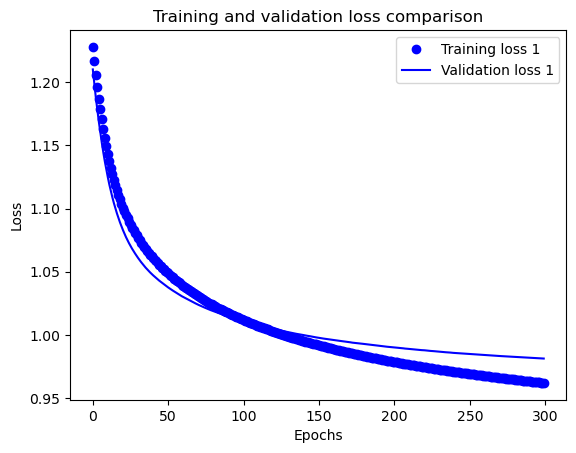

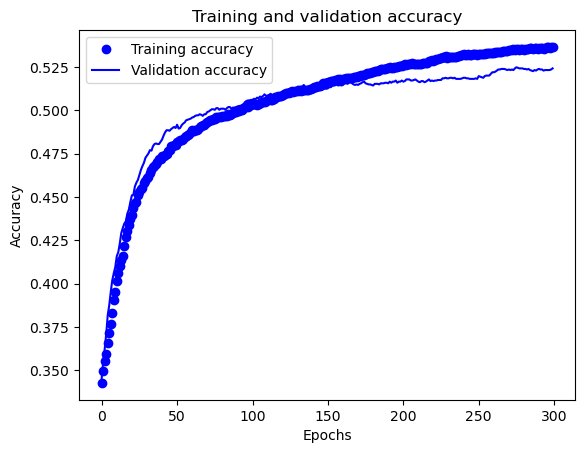

In [31]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


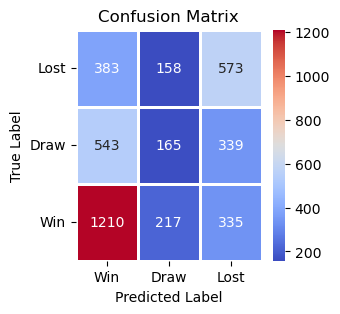

              precision    recall  f1-score   support

           0       0.57      0.69      0.62      1762
           1       0.31      0.16      0.21      1047
           2       0.46      0.51      0.49      1114

    accuracy                           0.50      3923
   macro avg       0.44      0.45      0.44      3923
weighted avg       0.47      0.50      0.47      3923



In [32]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

In [33]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 3ms/step - loss: 1.0105 - accuracy: 0.4966


W każdym modelu możemy zauważyć, że występuje problem z remisami. Jest ich w zbiorze 1000, a nasz model rozpoznaje zazwyczaj tylko ok. 50 z nich, co stanowi tylko 5%. W tym modelu uzyskaliśmy najlepsze wyniki dla remisów, gdzie dobrze rozpoznanych jest ich 165. Jednak accuracy jest na poziomie ok. 50%, a w przypadku naszych najlepszych modeli było to 53-55%. Sposobem na zwiększenie accuracy mogło by być rozwiązanie problemu właśnie z tymi wynikami znajdującymi się "pomiędzy" zwycięstwem, a przegraną. W tym wypadku trzeba by było zmodyfikować wybieranie wyniku na ostatniej warstwie. Jednak tego już nie przetestujemy w tym notebooku :-(

# Wnioski z analizy i eksperymentów z sieciami neuronowymi

Rozglądając się w internecie za inspiracją do znalezienia optymalnej sieci do tego problemu natknęliśmy się na różne podejścia do problemu przewidywania meczy. Niestety nie udało się znaleźć nam podobnego do naszego sposobu, gdzie wykorzystywane były by atrybuty z gry FIFA w powiązaniu z wynikami realnych meczy. Natomiast natrafiliśmy na jeden ciekawy artykuł (https://publications.lib.chalmers.se/records/fulltext/250411/250411.pdf), gdzie autor przeprowadza predykcję na bieżąco biorąc pod uwagę aktualne wydarzenia z meczu. Dzięki temu podejściu udało mu się uzyskać model na poziomie 80%, co jest zaskakująco dobrym wynikiem. Jednak wyciągneliśmy z tego artykułu również inną ciekawą informację - o accuracy w przewidywaniu meczów dla bukmacherów, gazet oraz doświadczonych ludzi, którzy obstawiają. Udało nam się przebić bukmacherów i uzyskać podobny poziom do gazet. Niestety do ludzi, którzy czynnie biorą udział w predykcji meczów nie udało nam się "dorosnąć" modelem.
Jeśli chodzi o wnioski, które zauważyliśmy podczas eksperymentów i szukania optymalnego rozwiązania:
- Skalowanie danych ma duże znaczenie, mimo że nie uwzględniliśmy tego modelu powyżej to, gdy nie przeskalujemy danych nasz model nie uczył się wogóle, lecz przewidywał zawsze zwycięstwo drużyny grającej u siebie 
- Często nawet do bardzo skomplikowanych problemów i zbiorów danych, dobrze sprawdzają się mniejsze sieci niż początkowo można by zakładać
- Zmiana architektury i kształtu sieci może korzystnie wpłynąć na wyniki, “trójkątna” sieć nie zawsze jest optymalna i warto poeksperymentować
- Ważna jest analiza tego jak działa sieć, a nie tylko jakie daje wyniki. Analizę taką można przeprowadzić z użyciem np. macierzy konfuzji, która pokazuje zależności i preferencje w predykcjach sieci